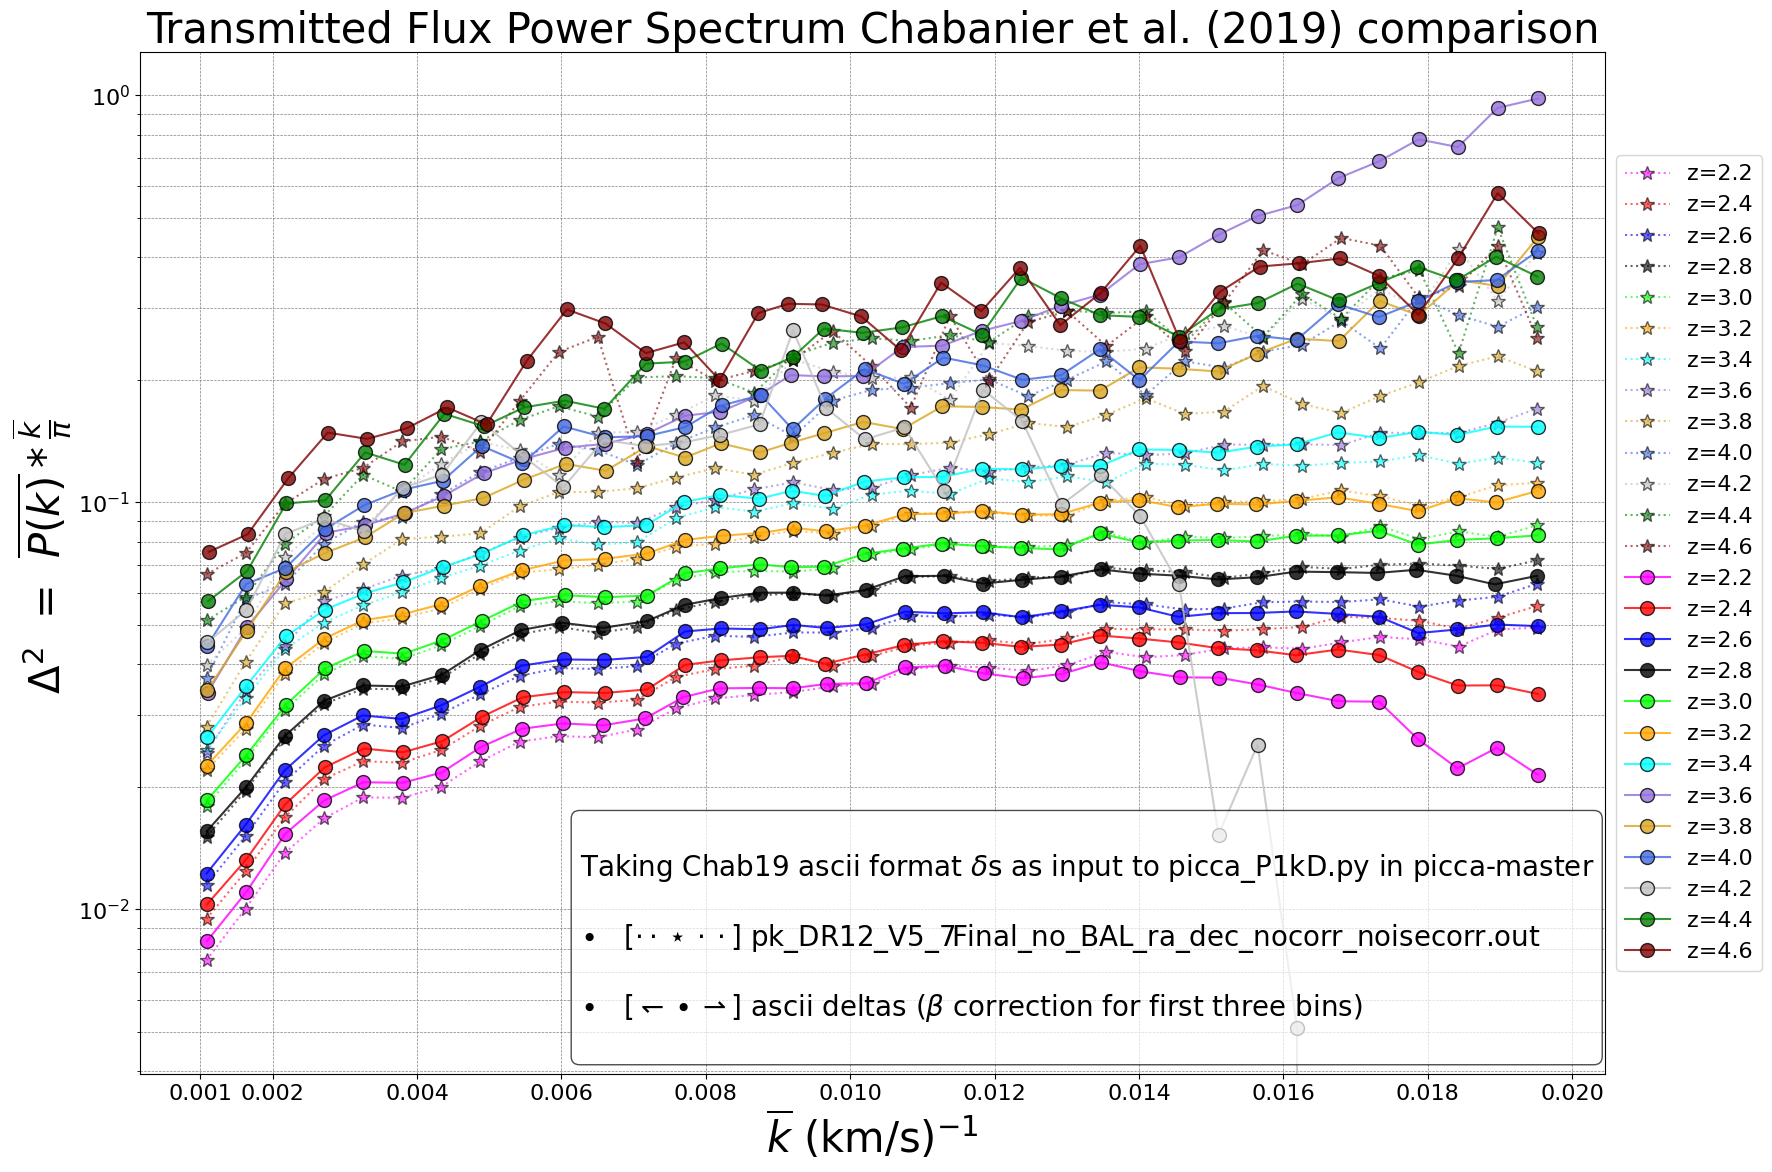

In [1]:
import os
import sys
import glob
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table
import pandas as pd

local_dir="/home/colgoat/TFPS"

file1="pk_DR12_V5_7Final_CorentinCopy.fits"
local_fileCh = os.path.join(local_dir,file1)
PSCh=Table.read(local_fileCh)

file2="mean_Pk1d_run15.1.fits.gz"
local_fileA = os.path.join(local_dir,file2)
PSA=Table.read(local_fileA)

file3="mean_Pk1d_Chbrun5.1.fits"
local_fileB = os.path.join(local_dir,file3)
PSB=Table.read(local_fileB)


qlor = ["magenta","red","blue","black","lime","orange","cyan","mediumpurple","goldenrod","royalblue","silver","green","maroon"]
lbl = ["z=2.2","z=2.4","z=2.6","z=2.8","z=3.0","z=3.2","z=3.4","z=3.6","z=3.8","z=4.0","z=4.2","z=4.4","z=4.6"]
trs = [0.6,0.8,1.0]

num=13 #number of redshift bins to be plotted
ini=0 #Starter plotting bin

#ini  = { 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ,10 ,11 ,12 }
z_bin = [2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6]

#plt.rcParams["figure.figsize"] = [17, 17]
plt.rcParams["figure.figsize"] = [18, 12]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['font.size'] = '16'


for a in range(num):
    binZCh = (PSCh['zbin'] == z_bin[ini+a])
    plCh = PSCh[binZCh]
    kCh = plCh['meank']
    PCh = (plCh['meanPk'] *  plCh['meank'])/np.pi
    plt.plot(kCh,PCh, '*', label = lbl[ini+a], markersize = 10, color = qlor[ini+a], alpha = trs[0], mec ='k'
    , linestyle = ":")

for b in range(num):
    binZA = (PSA['zbin'] == z_bin[ini+b])
    plA = PSA[binZA]
    kA = plA['meank']
    PA = (plA['meanPk'] *  plA['meank'])/np.pi
    plt.plot(kA,PA, 'o', label = lbl[ini+b], markersize = 10, color = qlor[ini+b], alpha = trs[1], mec ='k'
    , linestyle = "-")
    
for c in range(num):
    binZB = (PSB['zbin'] == z_bin[ini+c])
    plB = PSB[binZB]
    kB = plB['meank']
    PB = (plB['meanPk'] *  plB['meank'])/np.pi
    #plt.plot(kB,PB, 's', label = lbl[ini+c], markersize = 5, color = qlor[ini+c], alpha = trs[2], mec ='k'
    #, linestyle = "--")


plt.xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$', size = 30)
plt.yscale('log')
plt.grid(True, which="both", ls="--", color = 'gray', linewidth = 0.5)
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020])
#plt.xticks([0.000, 0.0025, 0.0050, 0.0075,0.0100, 0.0125, 0.0150,0.0175,0.0200])
#plt.xlim(0.0009,0.0201)
#plt.ylim(0.005,0.6)


props = dict(boxstyle='round', facecolor='white', alpha=0.7)
textstr = '\n'.join((
    r'',
    #r'FP1D from the catalog classified by Z_VI (167896 spectra)',
    #r'TFPS computed from DR14 subcatalog using 167896',
    r'Taking Chab19 ascii format $\delta$s as input to picca_P1kD.py in picca-master',
    #r'$\delta$ Deltas from DR14',
    r'',
    r'$\bullet$   [$\cdot\cdot\star\cdot\cdot$] pk_DR12_V5_7Final_no_BAL_ra_dec_nocorr_noisecorr.out   ', #% (mu, ),
    
    r'',
    #r'$\bullet$ $\delta$(version4) + P1D(newest ver) + postpro(eboss cut sch)    [$\leftharpoondown\bullet\rightharpoonup$]',
    #r'$\bullet$ P1D(k) out of $\delta$’s(master) from DR14 specs   [$\leftharpoondown\bullet\rightharpoonup$]',
    
    #r'$ \bullet$   [$\leftharpoondown\bullet\rightharpoonup$] P1D(k) out of DR14 spectra  (${\delta}_{F}$ DR14) ',
    r'$ \bullet$   [$\leftharpoondown\bullet\rightharpoonup$] ascii deltas ($\beta$ correction for first three bins) ',
    
    r'',
    #r'$\delta$(old) + P1D(old) + postpro(eboss cut sch)'))#,#,# % (median, ),
    #r'$\delta$(old) $\longrightarrow$ P1D(master) $\longrightarrow$ postpro(eboss cut sch, new binning)',
    
    
    #r'',
    #r'$\delta$(old) + P1D(old) + postpro(eboss cut sch)'))#,#,# % (median, ),
    #r'* Using --order 0 flag',



    ))
    #r'',
    #r'$\bullet$ $\delta$ Chabanier’s deltas     [$-- \boxdot --$]'))#,# % (median, ),
    #r'$\bullet$ picca-master(picca_delta_extraction.py)     [$\leftharpoondown\bullet\rightharpoonup$]',#)#,#,# % (median, ),
    #r'$\bullet$ picca-old(picca_deltas.py)     [$-- \boxdot --$]'))#,# % (median, ),
    #r'picca_deltas.py   [$-- \boxdot --$]'))# % (sigma, )))
    #r'$\delta$(old) + P1D(old) + postpro(eboss cut sch)'))
    

ax.text(0.3, 0.25, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)




plt.title('Transmitted Flux Power Spectrum Chabanier et al. (2019) comparison', size = 30)
#plt.title('eBOSS DR16 Preliminary results using 70000 spectra', size = 30)
#plt.title('Picca’s versions comparison', size = 20)
plt.show()


In [9]:
import pandas as pd
file="/home/colgoat/TFPS/datapoints_p1d_fft_desi_edrm2_v1/p1d_measurement(copy).txt"
df = pd.read_csv(file, delim_whitespace = True, skiprows=0)
df

Z         K   K*PK/PI  K*ERR/PI      STAT  SYST_TOT  SYST_Noise  \
0    2.2  0.040581  0.004469  0.000641  0.000115  0.000631    0.000004   
1    2.2  0.069960  0.006932  0.000571  0.000107  0.000561    0.000008   
2    2.2  0.104242  0.009343  0.000473  0.000161  0.000445    0.000011   
3    2.2  0.143708  0.012514  0.000435  0.000200  0.000387    0.000016   
4    2.2  0.182074  0.016156  0.000490  0.000244  0.000425    0.000020   
..   ...       ...       ...       ...       ...       ...         ...   
463  3.8  1.815434  0.152554  0.019074  0.016133  0.010175    0.000790   
464  3.8  1.853467  0.131726  0.018261  0.015702  0.009324    0.000856   
465  3.8  1.891987  0.164872  0.023998  0.020794  0.011980    0.000927   
466  3.8  1.929938  0.179444  0.023909  0.019643  0.013630    0.001009   
467  3.8  1.968311  0.138842  0.024271  0.021475  0.011309    0.001091   

         SYST_PSF  SYST_Resolution  SYST_Side      band  SYST_Lines  \
0    1.459340e-07         0.000022   0.000000  0.000095    0.000003   
1    6.482761e-07         0.000032   0.000069  0.000141    0.000005   
2    1.888647e-06         0.000040   0.000034  0.000183    0.000007   
3    4.696170e-06         0.000051   0.000057  0.000236    0.000009   
4    9.638198e-06         0.000063   0.000184  0.000299    0.000011   
..            ...              ...        ...       ...         ...   
463  8.851239e-03         0.003423   0.003318  0.000146    0.000250   
464  8.053201e-03         0.003121   0.003183  0.000022    0.000218   
465  1.055092e-02         0.004098   0.003474  0.000108    0.000274   
466  1.200714e-02         0.004674   0.003943  0.000268    0.000300   
467  9.815327e-03         0.003830   0.003681  0.000331    0.000235   

         SYST_DLA  SYST_Continuum  SYST_DLA.1  completeness  
0    6.964419e-07        0.000623         NaN           NaN  
1    1.652704e-06        0.000538         NaN           NaN  
2    3.073858e-06        0.000402         NaN           NaN  
3    5.329996e-06        0.000296         NaN           NaN  
4    8.368688e-06        0.000231         NaN           NaN  
..            ...             ...         ...           ...  
463  1.157097e-03        0.000653         NaN           NaN  
464  1.050087e-03        0.000570         NaN           NaN  
465  1.371843e-03        0.000717         NaN           NaN  
466  1.556421e-03        0.000784         NaN           NaN  
467  1.268123e-03        0.000616         NaN           NaN  

[468 rows x 16 columns]

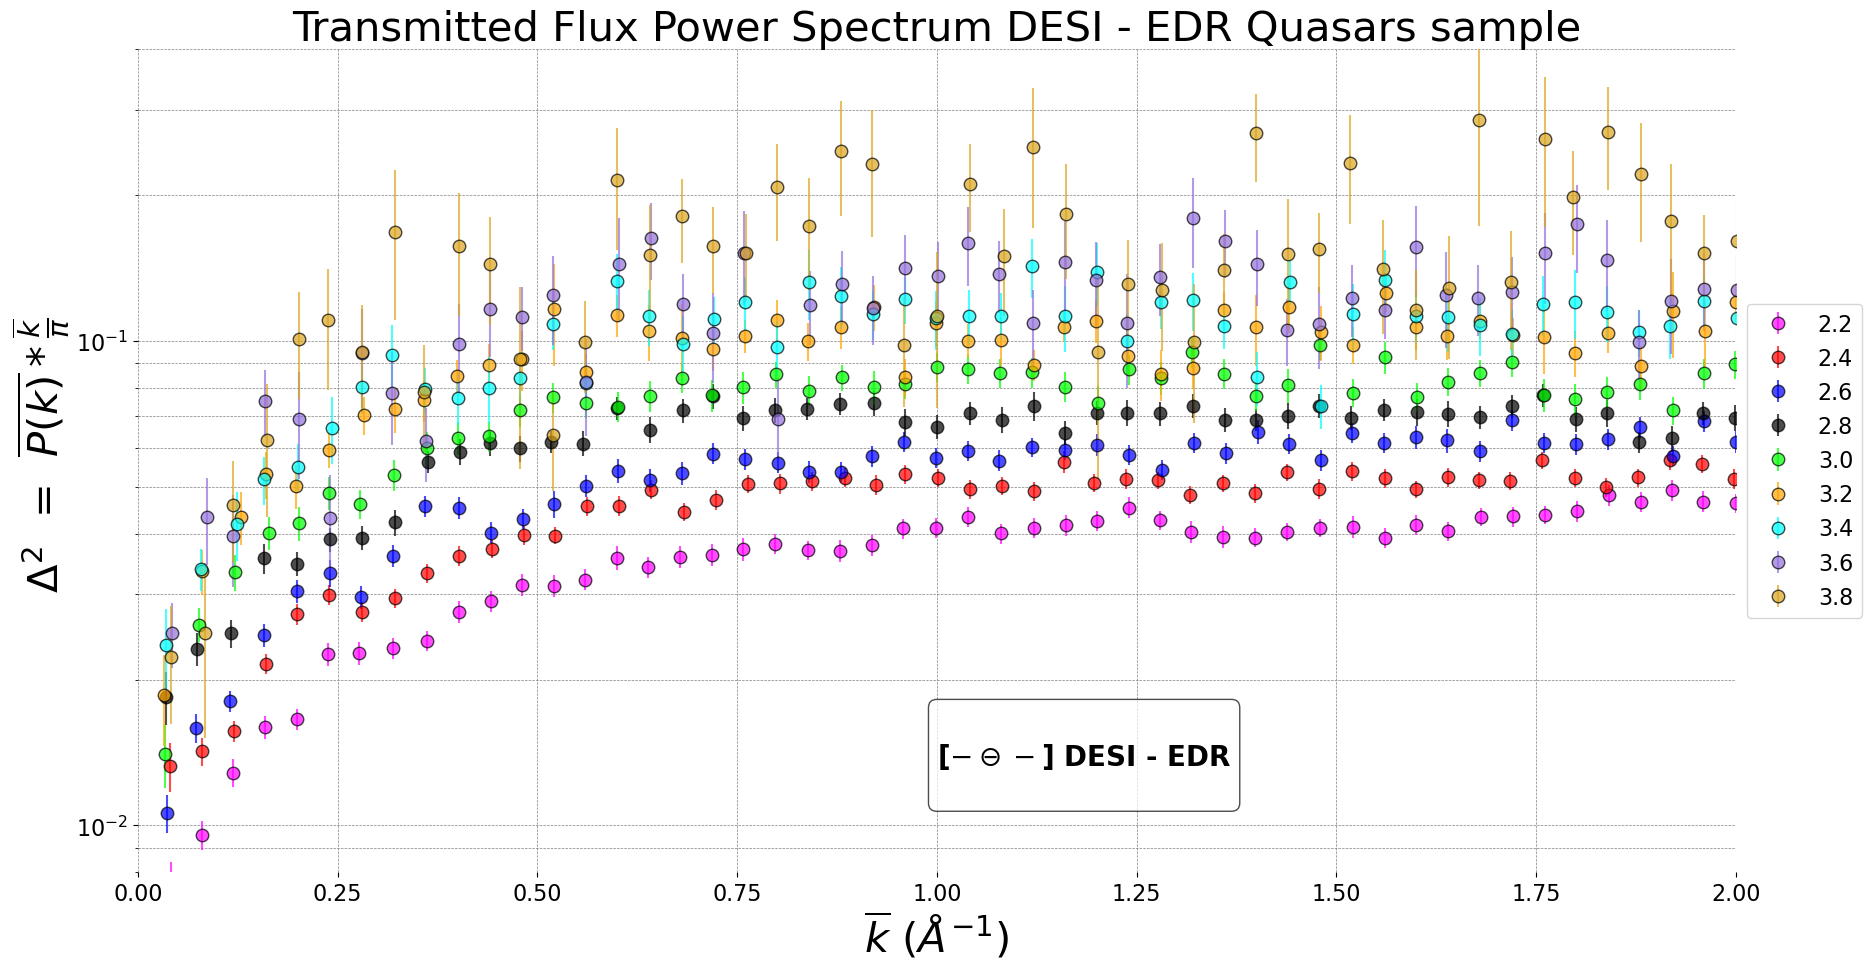

In [36]:
import os
import sys
import glob
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table
import pandas as pd

local_dir="/home/colgoat/TFPS"

file1="mean_Pk1d_DESIr1.fits.gz"
local_fileCh = os.path.join(local_dir,file1)
DES=Table.read(local_fileCh)

file2="mean_Pk1d_DESIr2.fits.gz"
local_file2 = os.path.join(local_dir,file2)
DES2=Table.read(local_file2)

qlor = ["magenta","red","blue","black","lime","orange", 
        "cyan","mediumpurple","goldenrod","royalblue","silver","green","maroon"]
lbl = ["z=2.2","z=2.4","z=2.6","z=2.8","z=3.0","z=3.2","z=3.4","z=3.6","z=3.8","z=4.0","z=4.2","z=4.4","z=4.6"]
trs = [1.0,0.7,0.7]

num=9 #number of redshift bins to be plotted
ini=0 #Starter plotting bin

#ini  = { 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ,10 ,11 ,12 }
z_bin = [2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6]

plt.rcParams["figure.figsize"] = [19, 10]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['font.size'] = '16'

for a in range(num):
    binS = (df['Z'] == z_bin[ini+a])
    plS = df[binS]
    kS = plS['K']
    PS = plS['K*PK/PI']
    erS = plS['K*ERR/PI']
    #plt.errorbar(kS,PS,yerr = erS, marker = '*', markersize = 9, \
    #color = qlor[ini+a], alpha = trs[0], mec ='none', linestyle = ":", label = str(z_bin[ini+a]))

for a in range(num):
    binZCh = (DES['zbin'] == z_bin[ini+a])
    plCh = DES[binZCh]
    kCh = plCh['meank']
    PCh = (plCh['meanPk'] *  plCh['meank'])/np.pi
    erCh = (plCh['errorPk'] *  plCh['meank'])/np.pi
    plt.errorbar(kCh,PCh,yerr = erCh, marker = 'o', markersize = 9, \
    color = qlor[ini+a], alpha = trs[1], mec ='k', linestyle = "none", label = str(z_bin[ini+a]))
    
for a in range(num):
    bin2 = (DES2['zbin'] == z_bin[ini+a])
    pl2 = DES2[bin2]
    k2 = pl2['meank']
    P2 = (pl2['meanPk'] *  pl2['meank'])/np.pi
    er2 = (pl2['errorPk'] *  pl2['meank'])/np.pi
    #plt.errorbar(k2,P2,yerr = er2, marker = 's', markersize = 9, \
    #color = qlor[ini+a], alpha = trs[2], mec ='k', linestyle = "none", label = str(z_bin[a]))


plt.xlabel('$\overline{k}$ $(\AA^{-1})$', size = 30)
plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$', size = 30)
plt.yscale('log')
plt.grid(True, which="both", ls="--", color = 'gray', linewidth = 0.5, axis = 'both')
plt.xlim(0,2.0)
plt.ylim(0.008,0.4)
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020])

props = dict(boxstyle='round', facecolor='white', alpha=0.7)
textstr = '\n'.join((
    r'',
    r'[$-\ominus-$] DESI - EDR',
    r'',
    ))
ax.text(0.5, 0.20, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props, weight = 'bold')
plt.title('Transmitted Flux Power Spectrum DESI - EDR Quasars sample', size = 30)
plt.show()

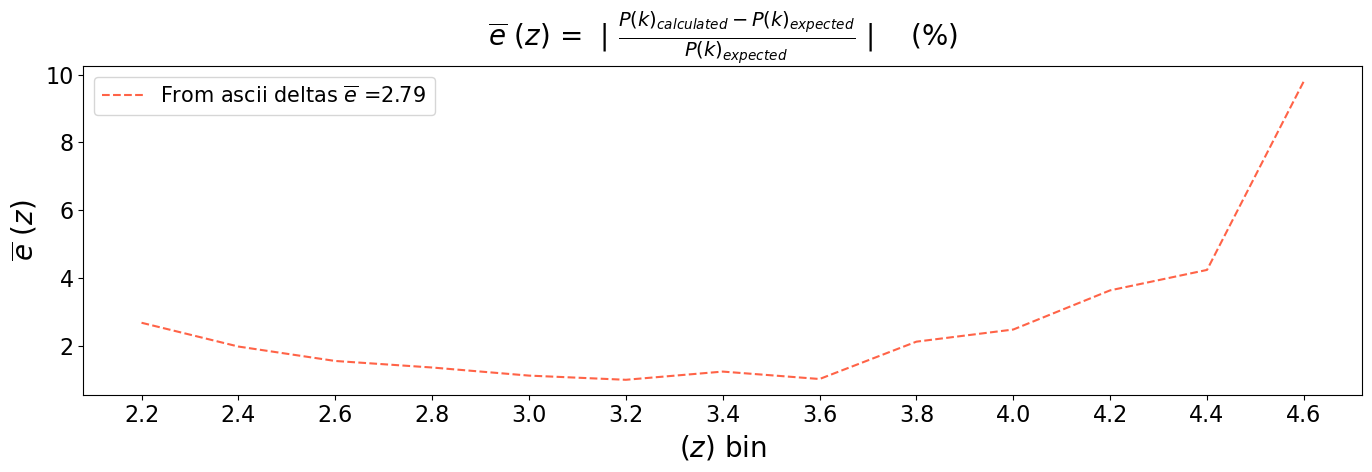

In [14]:
import os
import sys
import glob
import numpy as np
import scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table
from scipy.interpolate import make_interp_spline
from astropy.table import QTable
import astropy.units as u
from statistics import mean

local_dir="/home/colgoat/TFPS"

file0="uncor_meanPk1d_Chab19.fits"
local_fileCh = os.path.join(local_dir,file0)
PSCh=Table.read(local_fileCh)

file1="mean_Pk1d_Chbrun5.1.fits"
local_fileA = os.path.join(local_dir,file1)
PSA=Table.read(local_fileA)

file2="mean_Pk1d_run5.1.1.fits"
local_fileB = os.path.join(local_dir,file2)
PSB=Table.read(local_fileB)

file3="mean_Pk1d_run6.1.fits"
local_fileC = os.path.join(local_dir,file3)
PSC=Table.read(local_fileC)

file4="mean_Pk1d_run6.1.1.fits"
local_fileD = os.path.join(local_dir,file4)
PSD=Table.read(local_fileD)

file5="mean_Pk1d_run6.2.fits"
local_fileE = os.path.join(local_dir,file5)
PSE=Table.read(local_fileE)

file6="mean_Pk1d_run6.2.1.fits"
local_fileF = os.path.join(local_dir,file6)
PSF=Table.read(local_fileF)

file7="mean_Pk1d_run6.2.1.fits"
local_fileG = os.path.join(local_dir,file7)
PSG=Table.read(local_fileG)




num=13#number of redshift bins to be plotted
ini=0 #Starter plotting bin

#ini  = { 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ,10 ,11 ,12 }
zbin = [2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6]
bin_lab = ['2.2','2.4','2.6','2.8','3.0','3.2','3.4','3.6','3.8','4.0','4.2','4.4','4.6']

plCh = PSCh[0:455]
kCh = plCh['meank']
PCh = (plCh['meanPK'] *  plCh['meank'])/np.pi
plA = PSA[0:455]
kA = plA['meank']
PA = (plA['meanPk'] *  plA['meank'])/np.pi
'''plB = PSB[0:455]
kB = plB['meank']
PB = (plB['meanPk'] *  plB['meank'])/np.pi
plC = PSC[0:455]
kC = plC['meank']
PC = (plC['meanPk'] *  plC['meank'])/np.pi
plD = PSD[0:455]
kD = plD['meank']
PD = (plD['meanPk'] *  plD['meank'])/np.pi
plE = PSE[0:455]
kE = plE['meank']
PE = (plE['meanPk'] *  plE['meank'])/np.pi
plF = PSF[0:455]
kF = plF['meank']
PF = (plF['meanPk'] *  plF['meank'])/np.pi
plG = PSG[0:455]
kG = plG['meank']
PG = (plG['meanPk'] *  plG['meank'])/np.pi'''

#erA = abs((PA-PCh)/PCh)*100
#erB = abs((PB-PCh)/PCh)*100

#t = QTable(names=('1','2','3','4','5','6','7','8',
                  #'9','10','11','12','13','14','15','16','17','18',
                  #'19','20','21','22','23','24','25','26','27','28',
                  #'29','30','31','32','33','34','35'))
#t.rename_column('t', 'meank') 
#t.remove_row(0)



#bin_t = np.empty(shape=0) 
#bin_t = np.array(er[0:35])
#t.add_row(bin_t)


bines = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]
b1=[1] * 35
b2=[2] * 35
b3=[3] * 35
b4=[4] * 35
b5=[5] * 35
b6=[6] * 35
b7=[7] * 35
b8=[8] * 35
b9=[9] * 35
b10=[10] * 35
b11=[11] * 35
b12=[12] * 35
b13=[12] * 35
b14=[13] * 35

er0 = abs((PCh-PCh)/PCh)
erA = abs((PA-PCh)/PCh)*100
'''erB = abs((PB-PCh)/PCh)*100
erC = abs((PC-PCh)/PCh)*100
erD = abs((PD-PCh)/PCh)*100
erE = abs((PE-PCh)/PCh)*100
erF = abs((PF-PCh)/PCh)*100
erG = abs((PG-PCh)/PCh)*100'''

borA = []
borB = []
borC = []
borD = []
borE = []
borF = []
borG = []

for a in range(13):
    if a == 0:
        dx = a
        dy = (dx + 35)-1
    else:
        dx = (35 * a) 
        dy = (dx + 35)-1
    borA.append([np.mean(erA[dx:dy])])
'''    borB.append([np.mean(erB[dx:dy])])
    borC.append([np.mean(erC[dx:dy])])
    borD.append([np.mean(erD[dx:dy])])
    borE.append([np.mean(erE[dx:dy])])
    borF.append([np.mean(erF[dx:dy])])
    borG.append([np.mean(erG[dx:dy])])'''
    
        

plt.rcParams["figure.figsize"] = [14, 5]
plt.rcParams["figure.autolayout"] = True




#plt.plot(zbin,borA,'--', color = 'tomato', label = 'Running picca-master: P1D(k) out of $\delta$s from DR14 specs')
#plt.plot(zbin,borB,'--', color = 'blue', label = 'Running picca-old: P1D(k) out of $\delta$s from DR14 specs')
#plt.plot(zbin,borC,'-', color = 'green', label = 'Running picca-master: P1D(k) out of Chab19’s ascii $\delta$s ')



plt.plot(zbin,borA,'--', color = 'tomato', label = 'From ascii deltas $\overline{e}$ ='+str(round(mean(erA),2)))
#plt.plot(zbin,borA,'--', color = 'tomato', label = '$\delta$ (newest version (master)) + P1D (newest version (master)) + pos(no cut) $\overline{e}$ ='+str(round(mean(erA),2)))
#plt.plot(zbin,borB,'--', color = 'blue', label = '$\delta$ (newest version (master)) + P1D (newest version (master)) + pos(eboss cut sch) $\overline{e}$ ='+str(round(mean(erB),2)))
#plt.plot(zbin,borC,'-', color = 'green', label = '$\delta$ (version 4 (old)) + P1D (newest version (master)) + pos(no cut) $\overline{e}$ ='+str(round(mean(erC),2)))
#plt.plot(zbin,borD,'-', color = 'red', label = '$\delta$ (version 4 (old)) + P1D (newest version (master)) + pos(eboss cut sch) $\overline{e}$ ='+str(round(mean(erD),2)))
#plt.plot(zbin,borE,':', color = 'black', label = '$\delta$ (version 4 (old)) + P1D (version 4 (old)) + pos(no cut) $\overline{e}$ ='+str(round(mean(erE),2)))
#plt.plot(zbin,borF,':', color = 'orange', label = '$\delta$ (version 4 (old)) + P1D (version 4 (old)) + pos(eboss cut sch) $\overline{e}$ ='+str(round(mean(erF),2)))
#plt.plot(zbin,borG,':', color = 'Lime', label = '$\delta$ (old) + P1D (master) + pos(eboss cut sch) $\overline{e}$ ='+str(round(mean(erG),2)))
plt.xticks([2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6])
plt.xlabel(r"$(\mathit{z})$ bin", size = 20)
plt.ylabel(r"$\overline{e}$ ($\mathit{z}$)",size = 20)
plt.legend(fontsize="15")
plt.title(r"$\overline{e}$ ($\mathit{z}$) =  $|$ $\frac{{P(k)}_{calculated}-{P(k)}_{expected}}{{P(k)}_{expected}}$ $|$    (%)", size = 20)

plt.show()


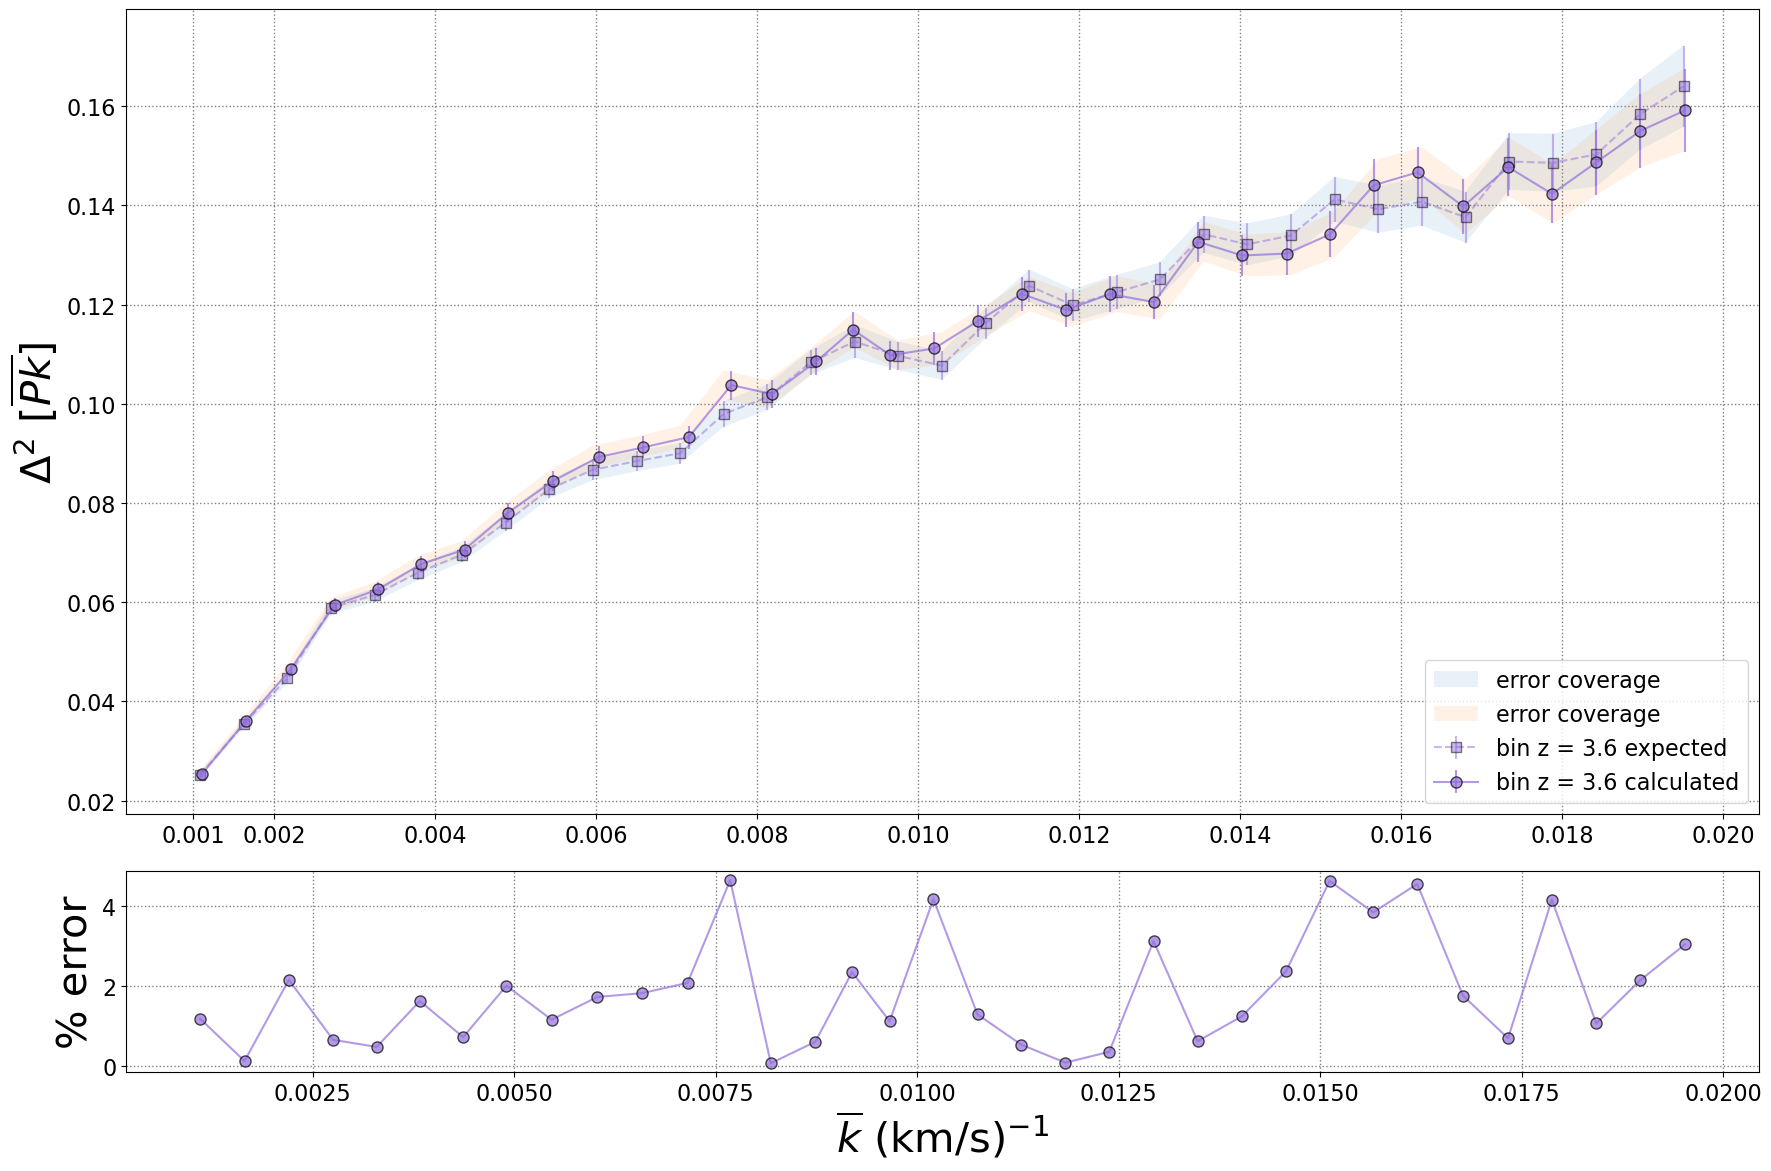

In [189]:
local_dir="/home/colgoat/TFPS"

#file1="uncor_meanPk1d_Chab19.fits"
file1="uncor_meanPk1d_Chab19.fits"
local_fileCh = os.path.join(local_dir,file1)
PSCh=Table.read(local_fileCh)

file2="mean_Pk1d_run13.1.fits"
local_fileA = os.path.join(local_dir,file2)
PSA=Table.read(local_fileA)


qlor = ["magenta","red","blue","black","lime","orange", 
        "cyan","mediumpurple","goldenrod","royalblue","silver","green","maroon"]

trs = [0.5,0.7,1.0]

num=1 #number of redshift bins to be plotted
ini=7 #Starter plotting bin

#ini  = { 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ,10 ,11 ,12 }
z_bin = [2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6]

#for a in range(num):
binZCh = (PSCh['zbin'] == z_bin[ini+a])
plCh = PSCh[binZCh]
kCh = plCh['meank']
PCh = (plCh['meanPK'] *  plCh['meank'])/np.pi
erCh = (plCh['A'] *  plCh['meank'])/np.pi
fu_Ch = ((erCh)) + (PCh) #fill upper
fl_Ch = (PCh) - ((erCh)) #fill lower

#for b in range(num):
binZA = (PSA['zbin'] == z_bin[ini+b])
plA = PSA[binZA]
kA = plA['meank']
PA = (plA['meanPk'] *  plA['meank'])/np.pi
erA = (plA['errorPk'] *  plA['meank'])/np.pi
fu_A = ((erA)) + (PA) #fill upper
fl_A = (PA) - ((erA)) #fill lower

EP = abs((plA['meanPk']-plCh['meanPK'])/plCh['meanPK'])*100

fig, axs = plt.subplots(2,1,figsize=(18,12), gridspec_kw={'height_ratios': [2, 0.5]})


axs[0].errorbar(kCh,PCh,yerr = erCh, marker = 's', label = "bin z = "+str(z_bin[ini+a])+" expected", markersize = 7,\
    color = qlor[ini+a], alpha = trs[0], mec ='k', linestyle = "--")
axs[0].fill_between(kCh,fu_Ch,fl_Ch, alpha = 0.1,label = 'error coverage')
axs[0].errorbar(kA,PA,yerr = erA, marker = 'o', label = "bin z = "+str(z_bin[ini+a])+" calculated", markersize = 8, \
    color = qlor[ini+b], alpha = trs[1], mec ='k', linestyle = "-")
axs[0].fill_between(kCh,fu_A,fl_A, alpha = 0.1,label = 'error coverage')
#axs[0].set_xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
axs[0].set_ylabel('${\Delta}^{2}$ [$\overline{Pk}$]', size = 30)
axs[0].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
axs[0].legend(loc='lower right', bbox_to_anchor=(1, 0))
axs[0].set_xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020])


axs[1].plot(kA,EP, marker = 'o', markersize = 8,color = qlor[ini+b], alpha = trs[1], mec ='k')
axs[1].set_xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
axs[1].set_ylabel('% error', size = 30)
axs[1].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)





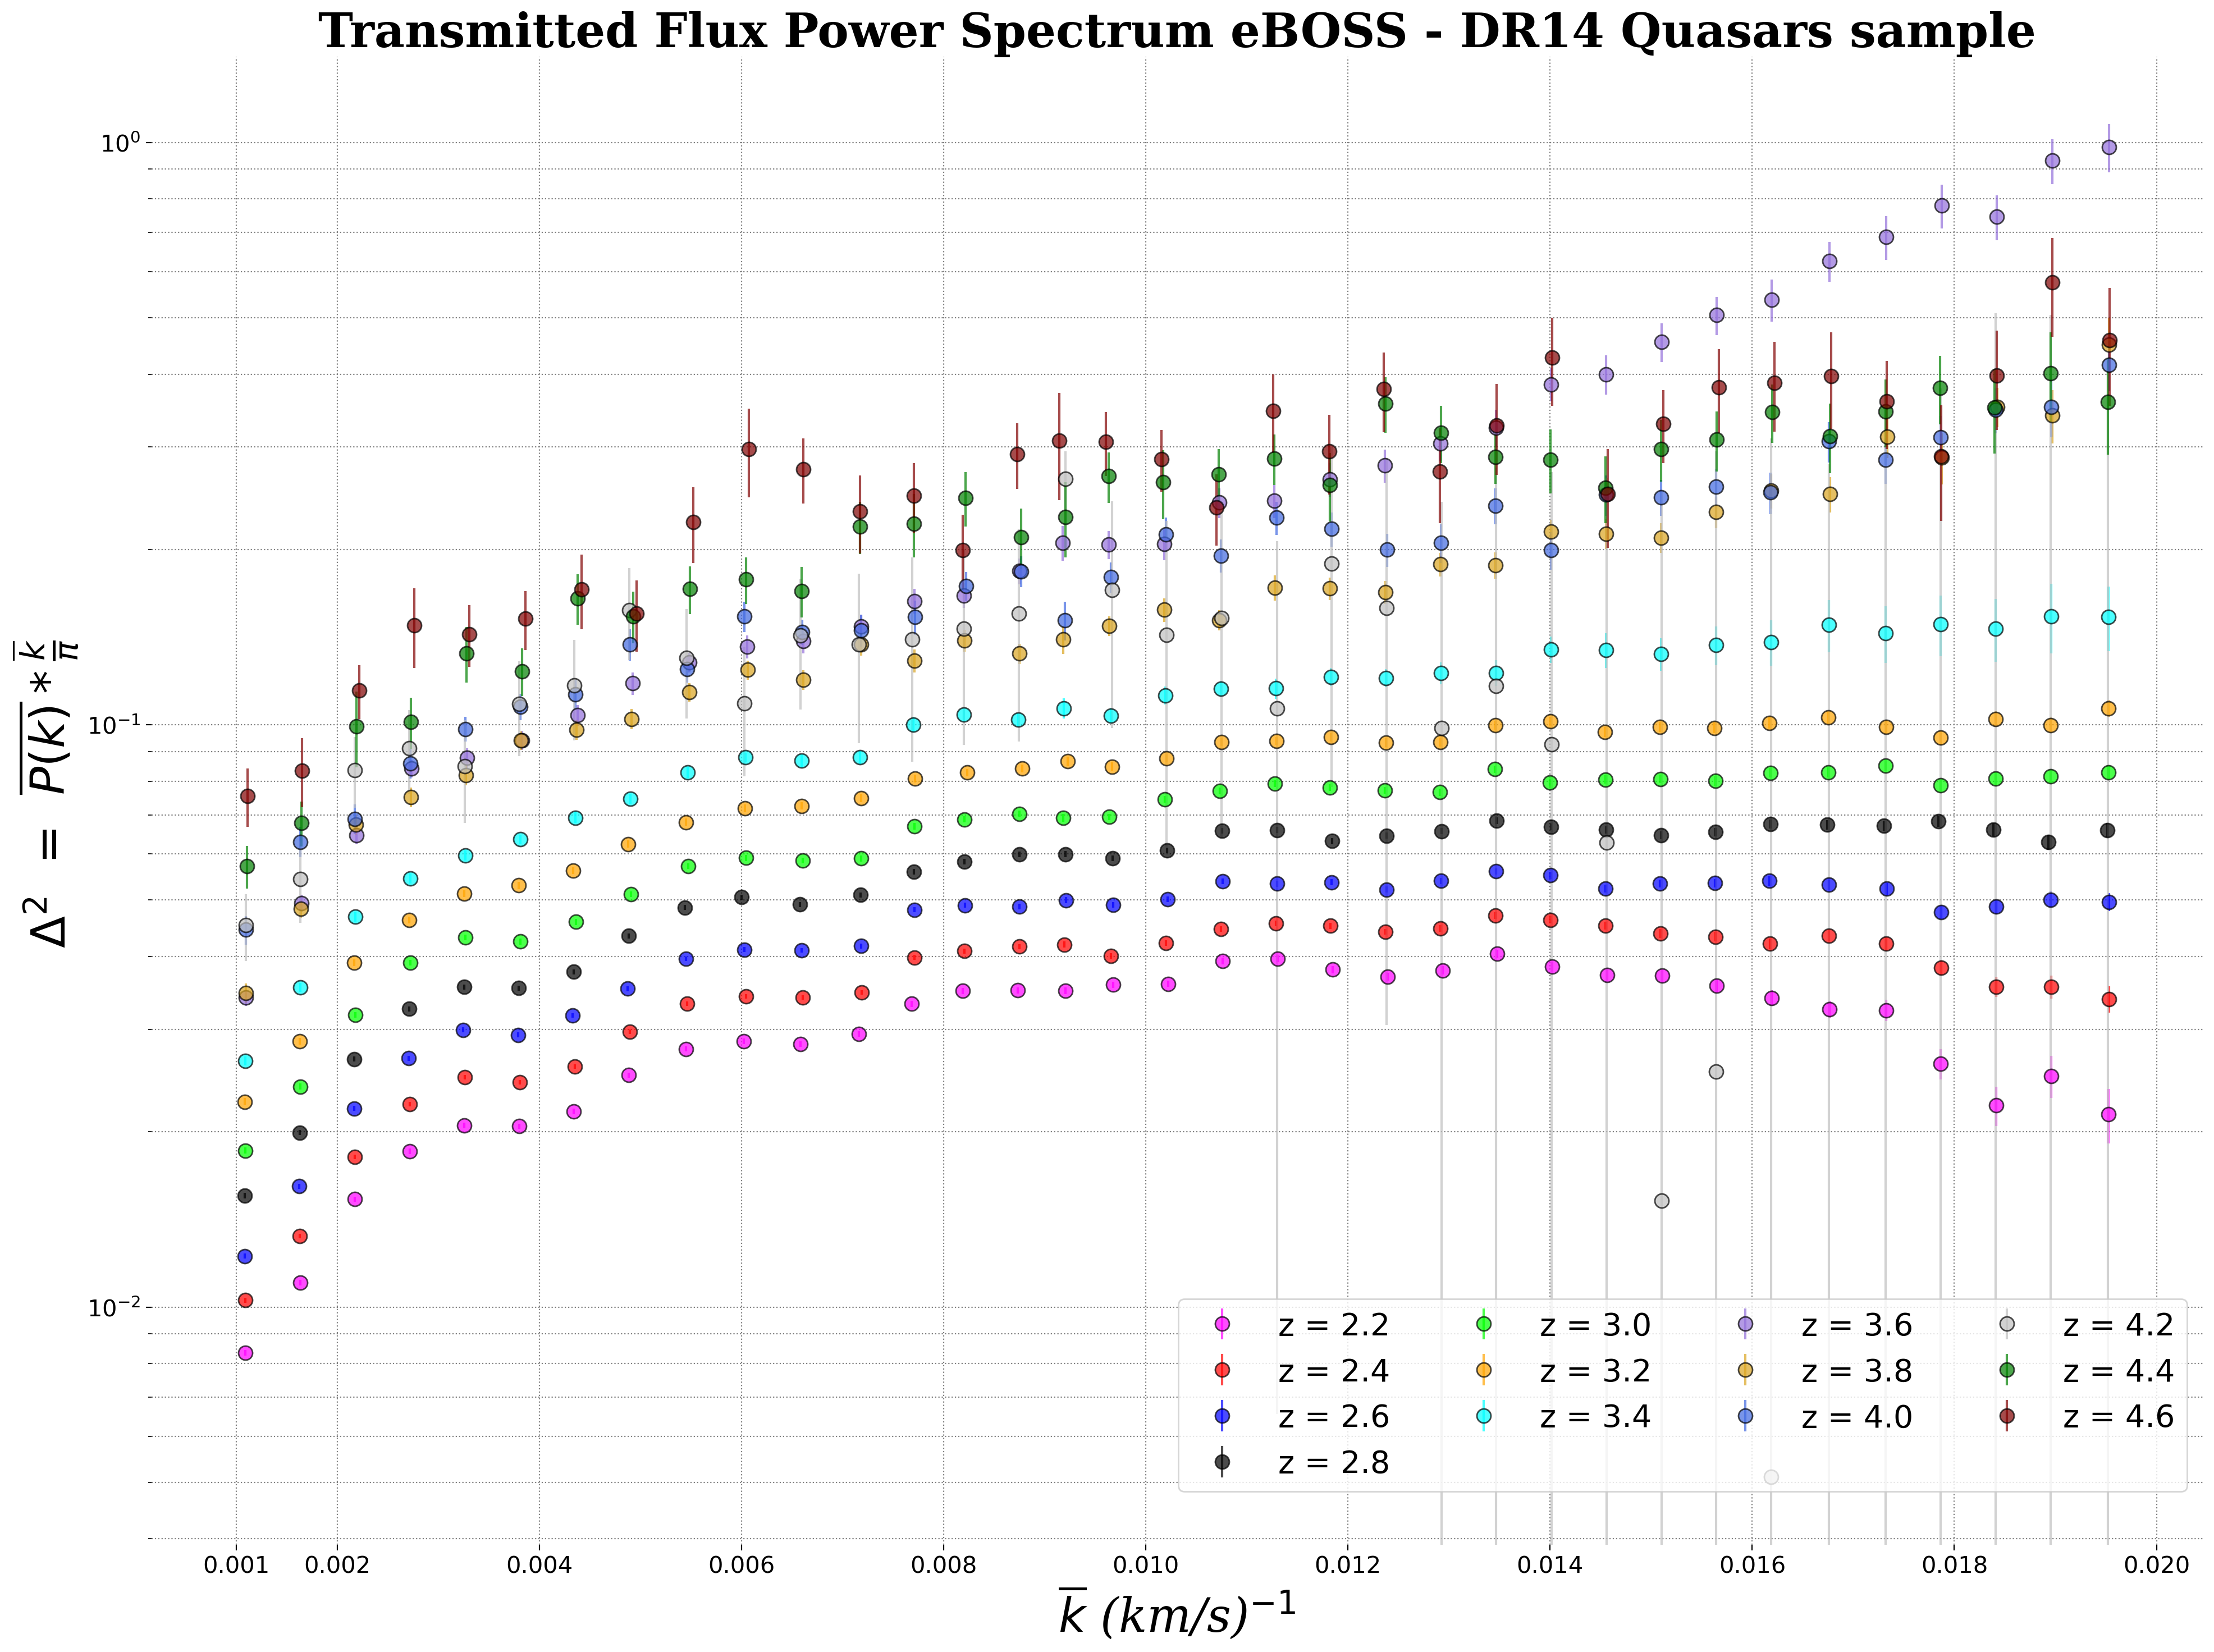

In [3]:
local_dir="/home/colgoat/TFPS"

#file1="uncor_meanPk1d_Chab19.fits"
file1="mean_Pk1d_run15.1.fits.gz"
local_fileCh = os.path.join(local_dir,file1)
PSCh=Table.read(local_fileCh)

file2="mean_Pk1d_DR162.1.fits"
local_fileA = os.path.join(local_dir,file2)
PSA=Table.read(local_fileA)


qlor = ["magenta","red","blue","black","lime","orange", 
        "cyan","mediumpurple","goldenrod","royalblue","silver","green","maroon"]

trs = [0.7,0.7,1.0]

num=13 #number of redshift bins to be plotted
ini=0 #Starter plotting bin

plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams["figure.figsize"] = [19, 10]
plt.rcParams["figure.autolayout"] = True

plt.figure(figsize=(20,15),dpi=200)


#ini  = { 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ,10 ,11 ,12 }
z_bin = [2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6]
for a in range(num):
    binZCh = (PSCh['zbin'] == z_bin[ini+a])
    plCh = PSCh[binZCh]
    kCh = plCh['meank']
    PCh = (plCh['meanPk'] *  plCh['meank'])/np.pi
    erCh = (plCh['errorPk'] *  plCh['meank'])/np.pi
    fu_Ch = ((erCh)) + (PCh) #fill upper
    fl_Ch = (PCh) - ((erCh)) #fill lower
    plt.errorbar(kCh,PCh,yerr = erCh, marker = 'o', label = "z = "+str(z_bin[ini+a]), markersize = 9,\
    color = qlor[ini+a], alpha = trs[0], mec ='k', linestyle = "none")

for b in range(num):
    binZA = (PSA['zbin'] == z_bin[ini+b])
    plA = PSA[binZA]
    kA = plA['meank']
    PA = (plA['meanPk'] *  plA['meank'])/np.pi
    erA = (plA['errorPk'] *  plA['meank'])/np.pi
    fu_A = ((erA)) + (PA) #fill upper
    fl_A = (PA) - ((erA)) #fill lower
    #plt.errorbar(kA,PA,yerr = erA, marker = 's', label = "z = "+str(z_bin[ini+b]), markersize = 9, \
    #color = qlor[ini+b], alpha = trs[1], mec ='k', linestyle = "none")

plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$',style = 'oblique', family = 'serif', size = 30)
plt.xlabel('$\overline{k}$ (km/s)$^{-1}$',style = 'oblique', family = 'serif', size = 30)
plt.yscale('log')
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.8)
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])
ax.legend(loc = 'lower right',bbox_to_anchor=(1, 0.025), ncol=4, fontsize = 20)
plt.xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020],fontsize = 15)
plt.yticks(fontsize = 15)


props = dict(boxstyle='round', facecolor='white', alpha=0.7)
textstr = '\n'.join((
    r'',
    #r'[$-\ominus-$] eBOSS DR14',
    #r'',
    r'[$\cdot\cdot\boxdot\cdot\cdot$] eBOSS DR16 ',
    r'',
    ))
#ax.text(0.025, 0.9, textstr, transform=ax.transAxes, fontsize=20,
        #verticalalignment='top', bbox=props, weight = 'bold')

plt.title('Transmitted Flux Power Spectrum eBOSS - DR14 Quasars sample', weight='semibold', style= 'normal', family = 'serif', size =30)
plt.show()

/home/colgoat/miniconda3/envs/hdcosmo/lib/python3.11/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


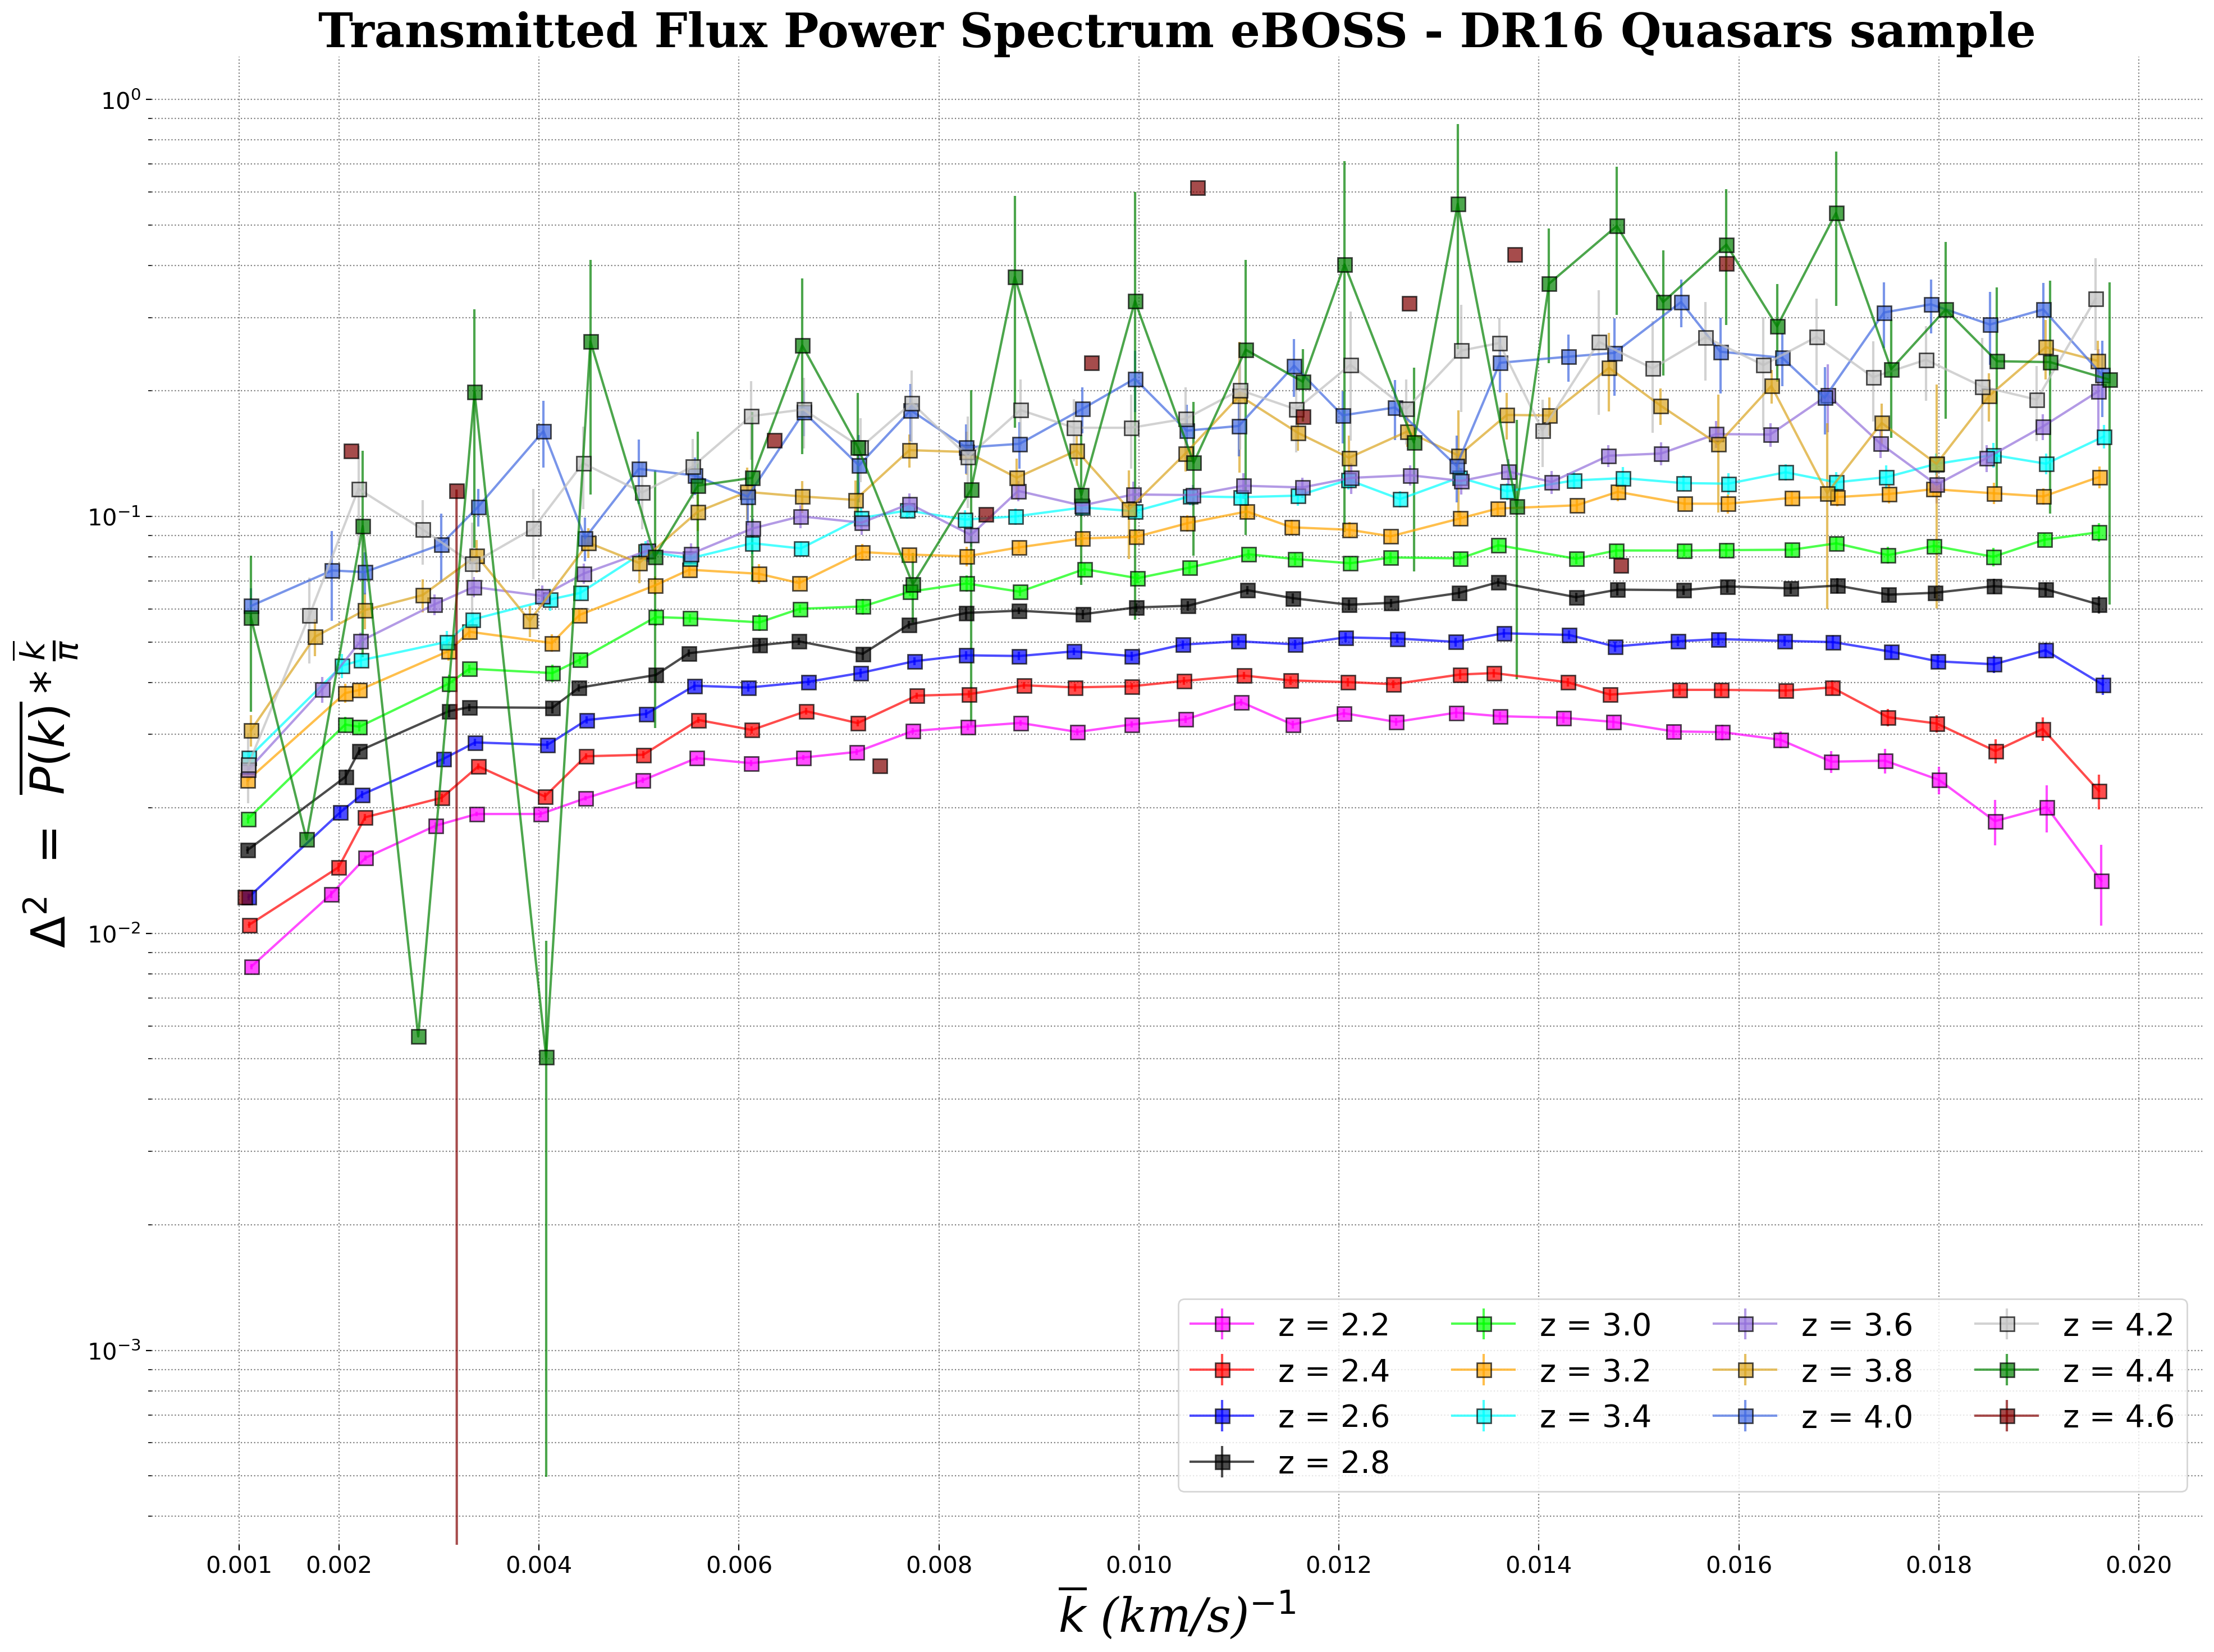

In [34]:
local_dir="/home/colgoat/TFPS"

#file1="uncor_meanPk1d_Chab19.fits"
file1="mean_Pk1d_run13.1.fits"
local_fileCh = os.path.join(local_dir,file1)
PSCh=Table.read(local_fileCh)

file2="mean_Pk1d_DR162.1.fits"
local_fileA = os.path.join(local_dir,file2)
PSA=Table.read(local_fileA)


qlor = ["magenta","red","blue","black","lime","orange", 
        "cyan","mediumpurple","goldenrod","royalblue","silver","green","maroon"]

trs = [0.7,0.7,1.0]

num=13 #number of redshift bins to be plotted
ini=0 #Starter plotting bin

plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams["figure.figsize"] = [19, 10]
plt.rcParams["figure.autolayout"] = True

plt.figure(figsize=(20,15),dpi=200)


#ini  = { 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ,10 ,11 ,12 }
z_bin = [2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6]

for b in range(num):
    binZA = (PSA['zbin'] == z_bin[ini+b])
    plA = PSA[binZA]
    kA = plA['meank']
    PA = (plA['meanPk'] *  plA['meank'])/np.pi
    erA = (plA['errorPk'] *  plA['meank'])/np.pi
    fu_A = ((erA)) + (PA) #fill upper
    fl_A = (PA) - ((erA)) #fill lower
    plt.errorbar(kA,PA,yerr = erA, marker = 's', label = "z = "+str(z_bin[ini+b]), markersize = 9, \
    color = qlor[ini+b], alpha = trs[1], mec ='k', linestyle = "-")

plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$',style = 'oblique', family = 'serif', size = 30)
plt.xlabel('$\overline{k}$ (km/s)$^{-1}$',style = 'oblique', family = 'serif', size = 30)
plt.yscale('log')
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.8)
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])
ax.legend(loc = 'lower right',bbox_to_anchor=(1, 0.025), ncol=4, fontsize = 20)
plt.xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020],fontsize = 15)
plt.yticks(fontsize = 15)


props = dict(boxstyle='round', facecolor='white', alpha=0.7)
textstr = '\n'.join((
    r'',
    #r'[$-\ominus-$] eBOSS DR14',
    #r'',
    r'[$\cdot\cdot\boxdot\cdot\cdot$] eBOSS DR16 ',
    r'',
    ))
#ax.text(0.025, 0.9, textstr, transform=ax.transAxes, fontsize=20,
        #verticalalignment='top', bbox=props, weight = 'bold')

plt.title('Transmitted Flux Power Spectrum eBOSS - DR16 Quasars sample', weight='semibold', style= 'normal', family = 'serif', size =30)
plt.show()

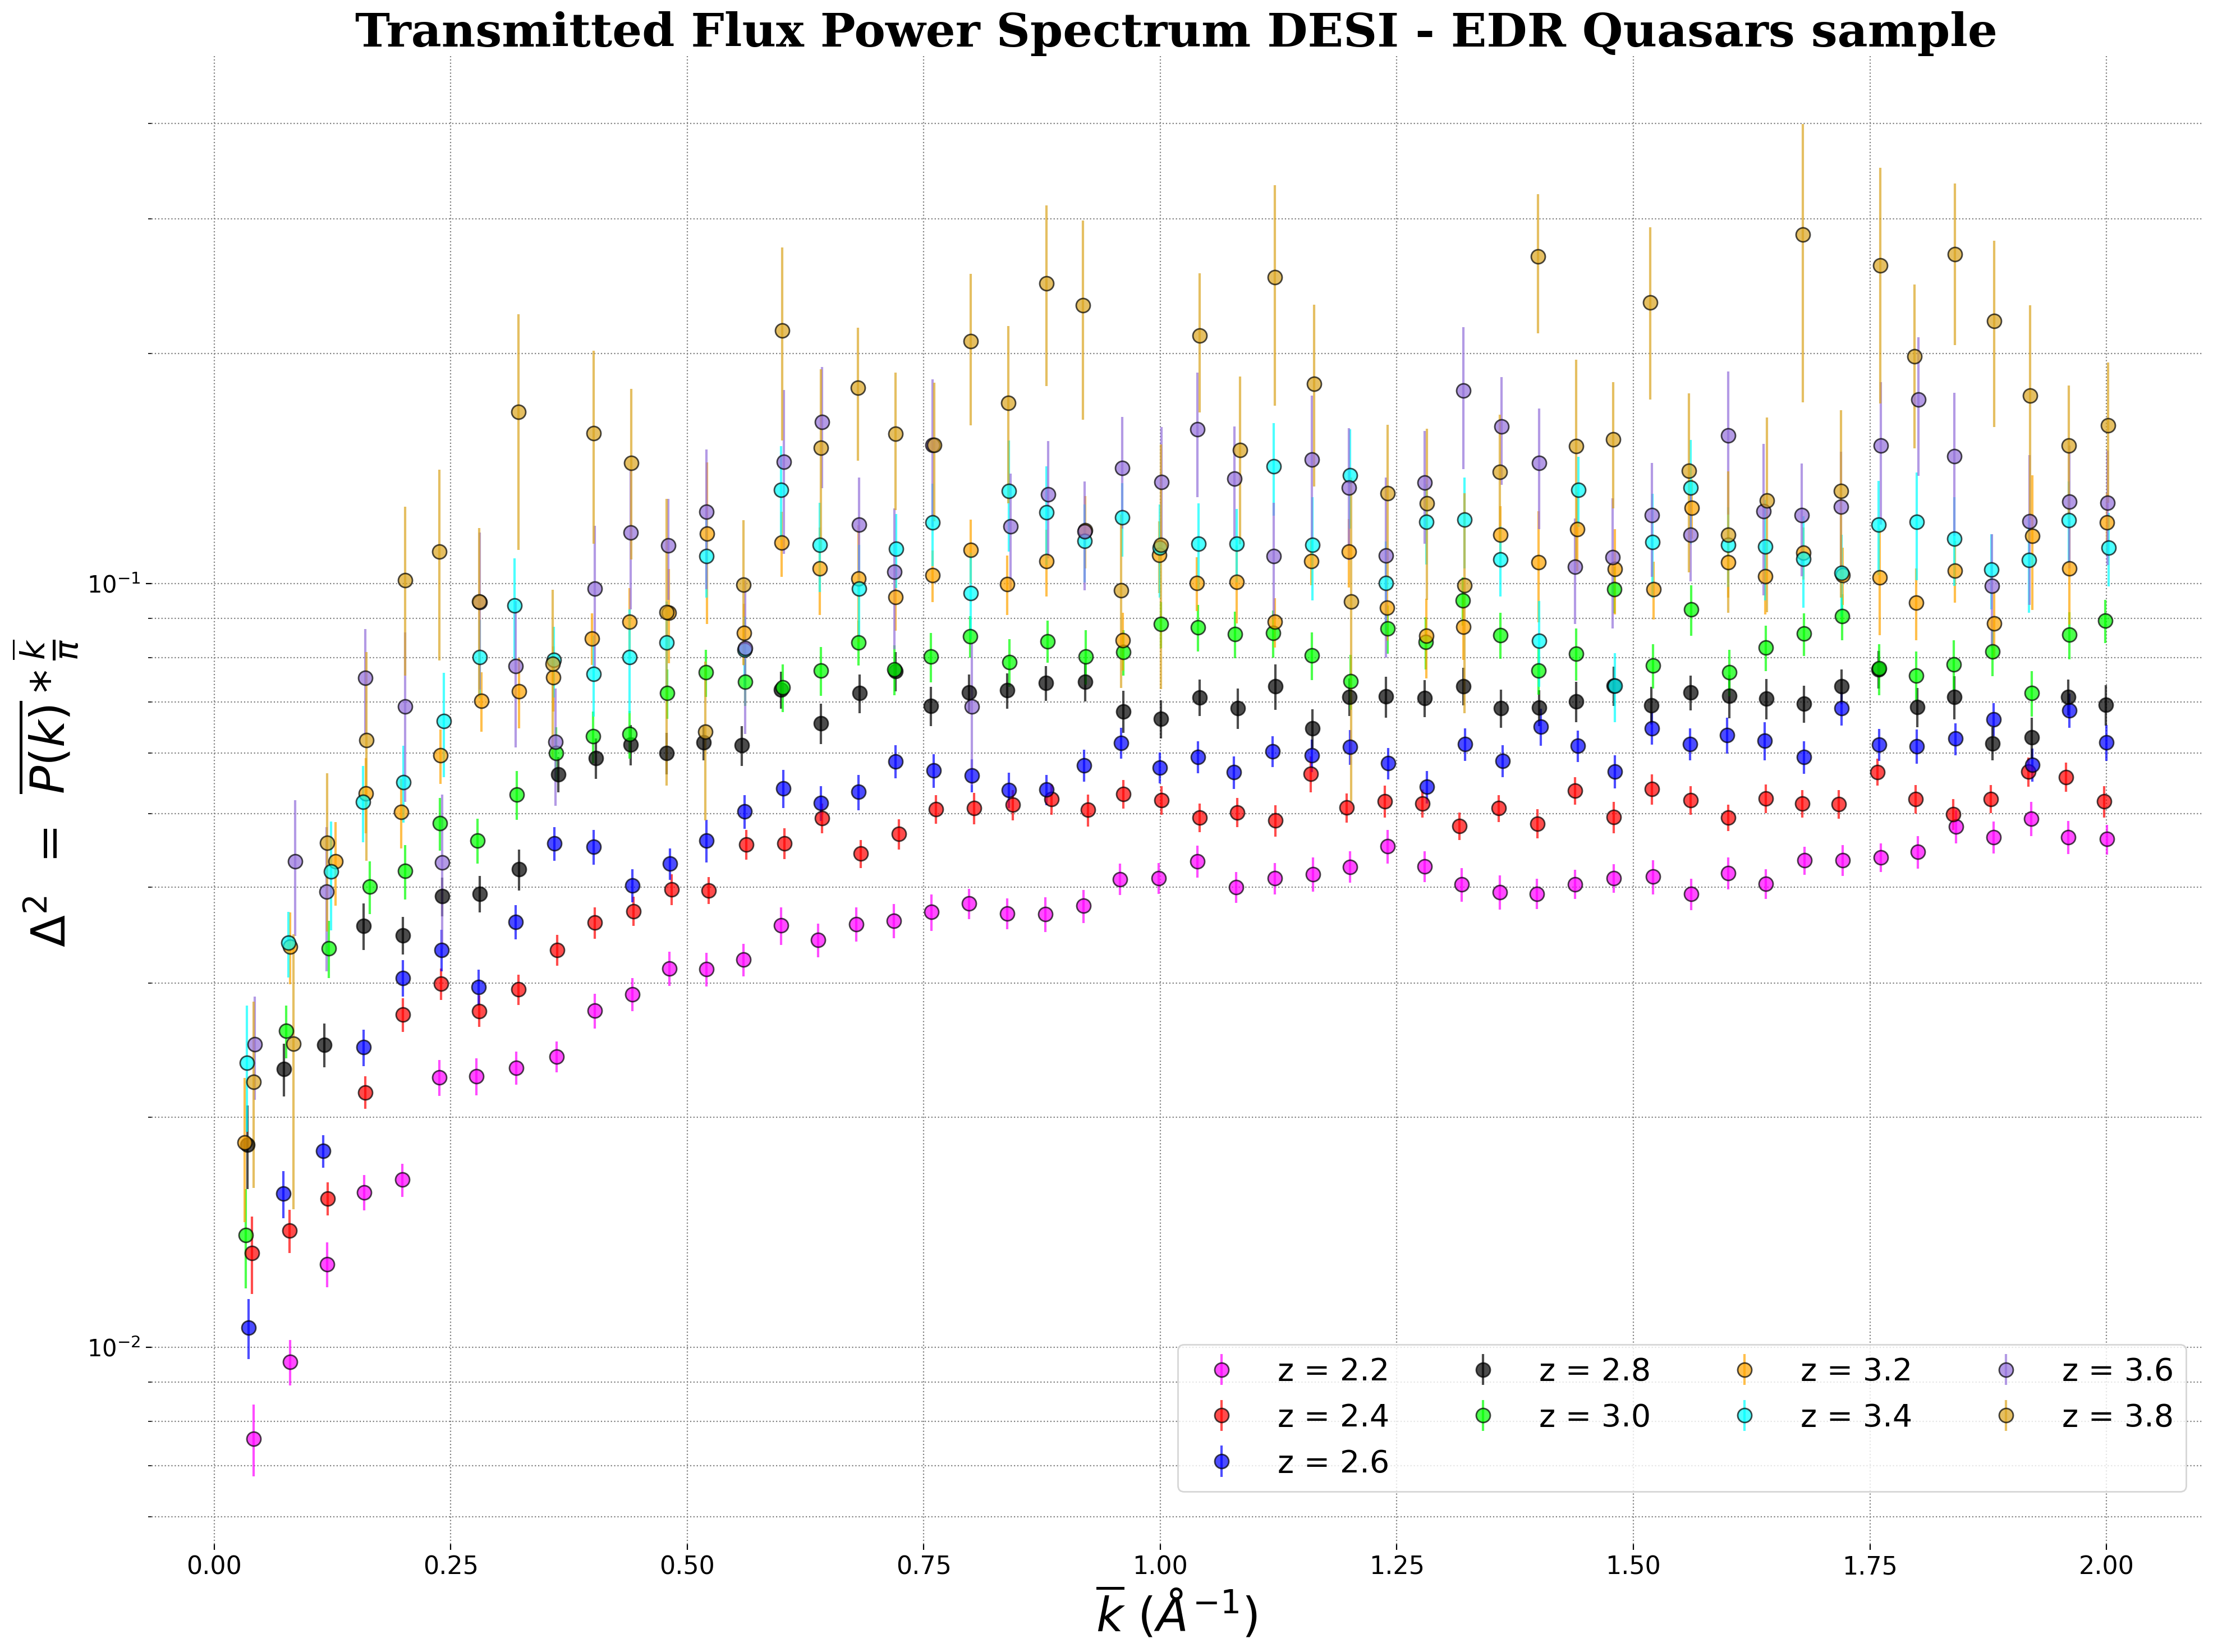

In [23]:
local_dir="/home/colgoat/TFPS"

#file1="uncor_meanPk1d_Chab19.fits"
file1="mean_Pk1d_DESIr1.fits.gz"
local_fileCh = os.path.join(local_dir,file1)
PSCh=Table.read(local_fileCh)


qlor = ["magenta","red","blue","black","lime","orange", 
        "cyan","mediumpurple","goldenrod","royalblue","silver","green","maroon"]

trs = [0.7,0.7,1.0]

num=9 #number of redshift bins to be plotted
ini=0 #Starter plotting bin

plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams["figure.figsize"] = [19, 10]
plt.rcParams["figure.autolayout"] = True

plt.figure(figsize=(20,15),dpi=200)


#ini  = { 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ,10 ,11 ,12 }
z_bin = [2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6]
for a in range(num):
    binZCh = (PSCh['zbin'] == z_bin[ini+a])
    plCh = PSCh[binZCh]
    kCh = plCh['meank']
    PCh = (plCh['meanPk'] *  plCh['meank'])/np.pi
    erCh = (plCh['errorPk'] *  plCh['meank'])/np.pi
    fu_Ch = ((erCh)) + (PCh) #fill upper
    fl_Ch = (PCh) - ((erCh)) #fill lower
    plt.errorbar(kCh,PCh,yerr = erCh, marker = 'o', label = "z = "+str(z_bin[ini+a]), markersize = 9,\
    color = qlor[ini+a], alpha = trs[0], mec ='k', linestyle = "none")

plt.ylabel(r' ${\Delta}^{2}$  =  $\overline{P(k)}*\frac{\overline{k}}{\pi{}}$',style = 'oblique', family = 'serif', size = 30)
plt.xlabel('$\overline{k}$ $(\AA^{-1})$',style = 'oblique', family = 'serif', size = 30)
plt.yscale('log')
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.8)
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])
ax.legend(loc = 'lower right',bbox_to_anchor=(1, 0.025), ncol=4, fontsize = 20)
#plt.xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020],fontsize = 15)
plt.yticks(fontsize = 15)


props = dict(boxstyle='round', facecolor='white', alpha=0.7)
textstr = '\n'.join((
    r'',
    #r'[$-\ominus-$] eBOSS DR14',
    #r'',
    r'[$\cdot\cdot\boxdot\cdot\cdot$] eBOSS DR16 ',
    r'',
    ))
#ax.text(0.025, 0.9, textstr, transform=ax.transAxes, fontsize=20,
        #verticalalignment='top', bbox=props, weight = 'bold')

plt.title('Transmitted Flux Power Spectrum DESI - EDR Quasars sample', weight='semibold', style= 'normal', family = 'serif', size =30)
plt.show()

Text(0.5, 1.0, 'Error estimation based on Chabanier et al.2019 results')

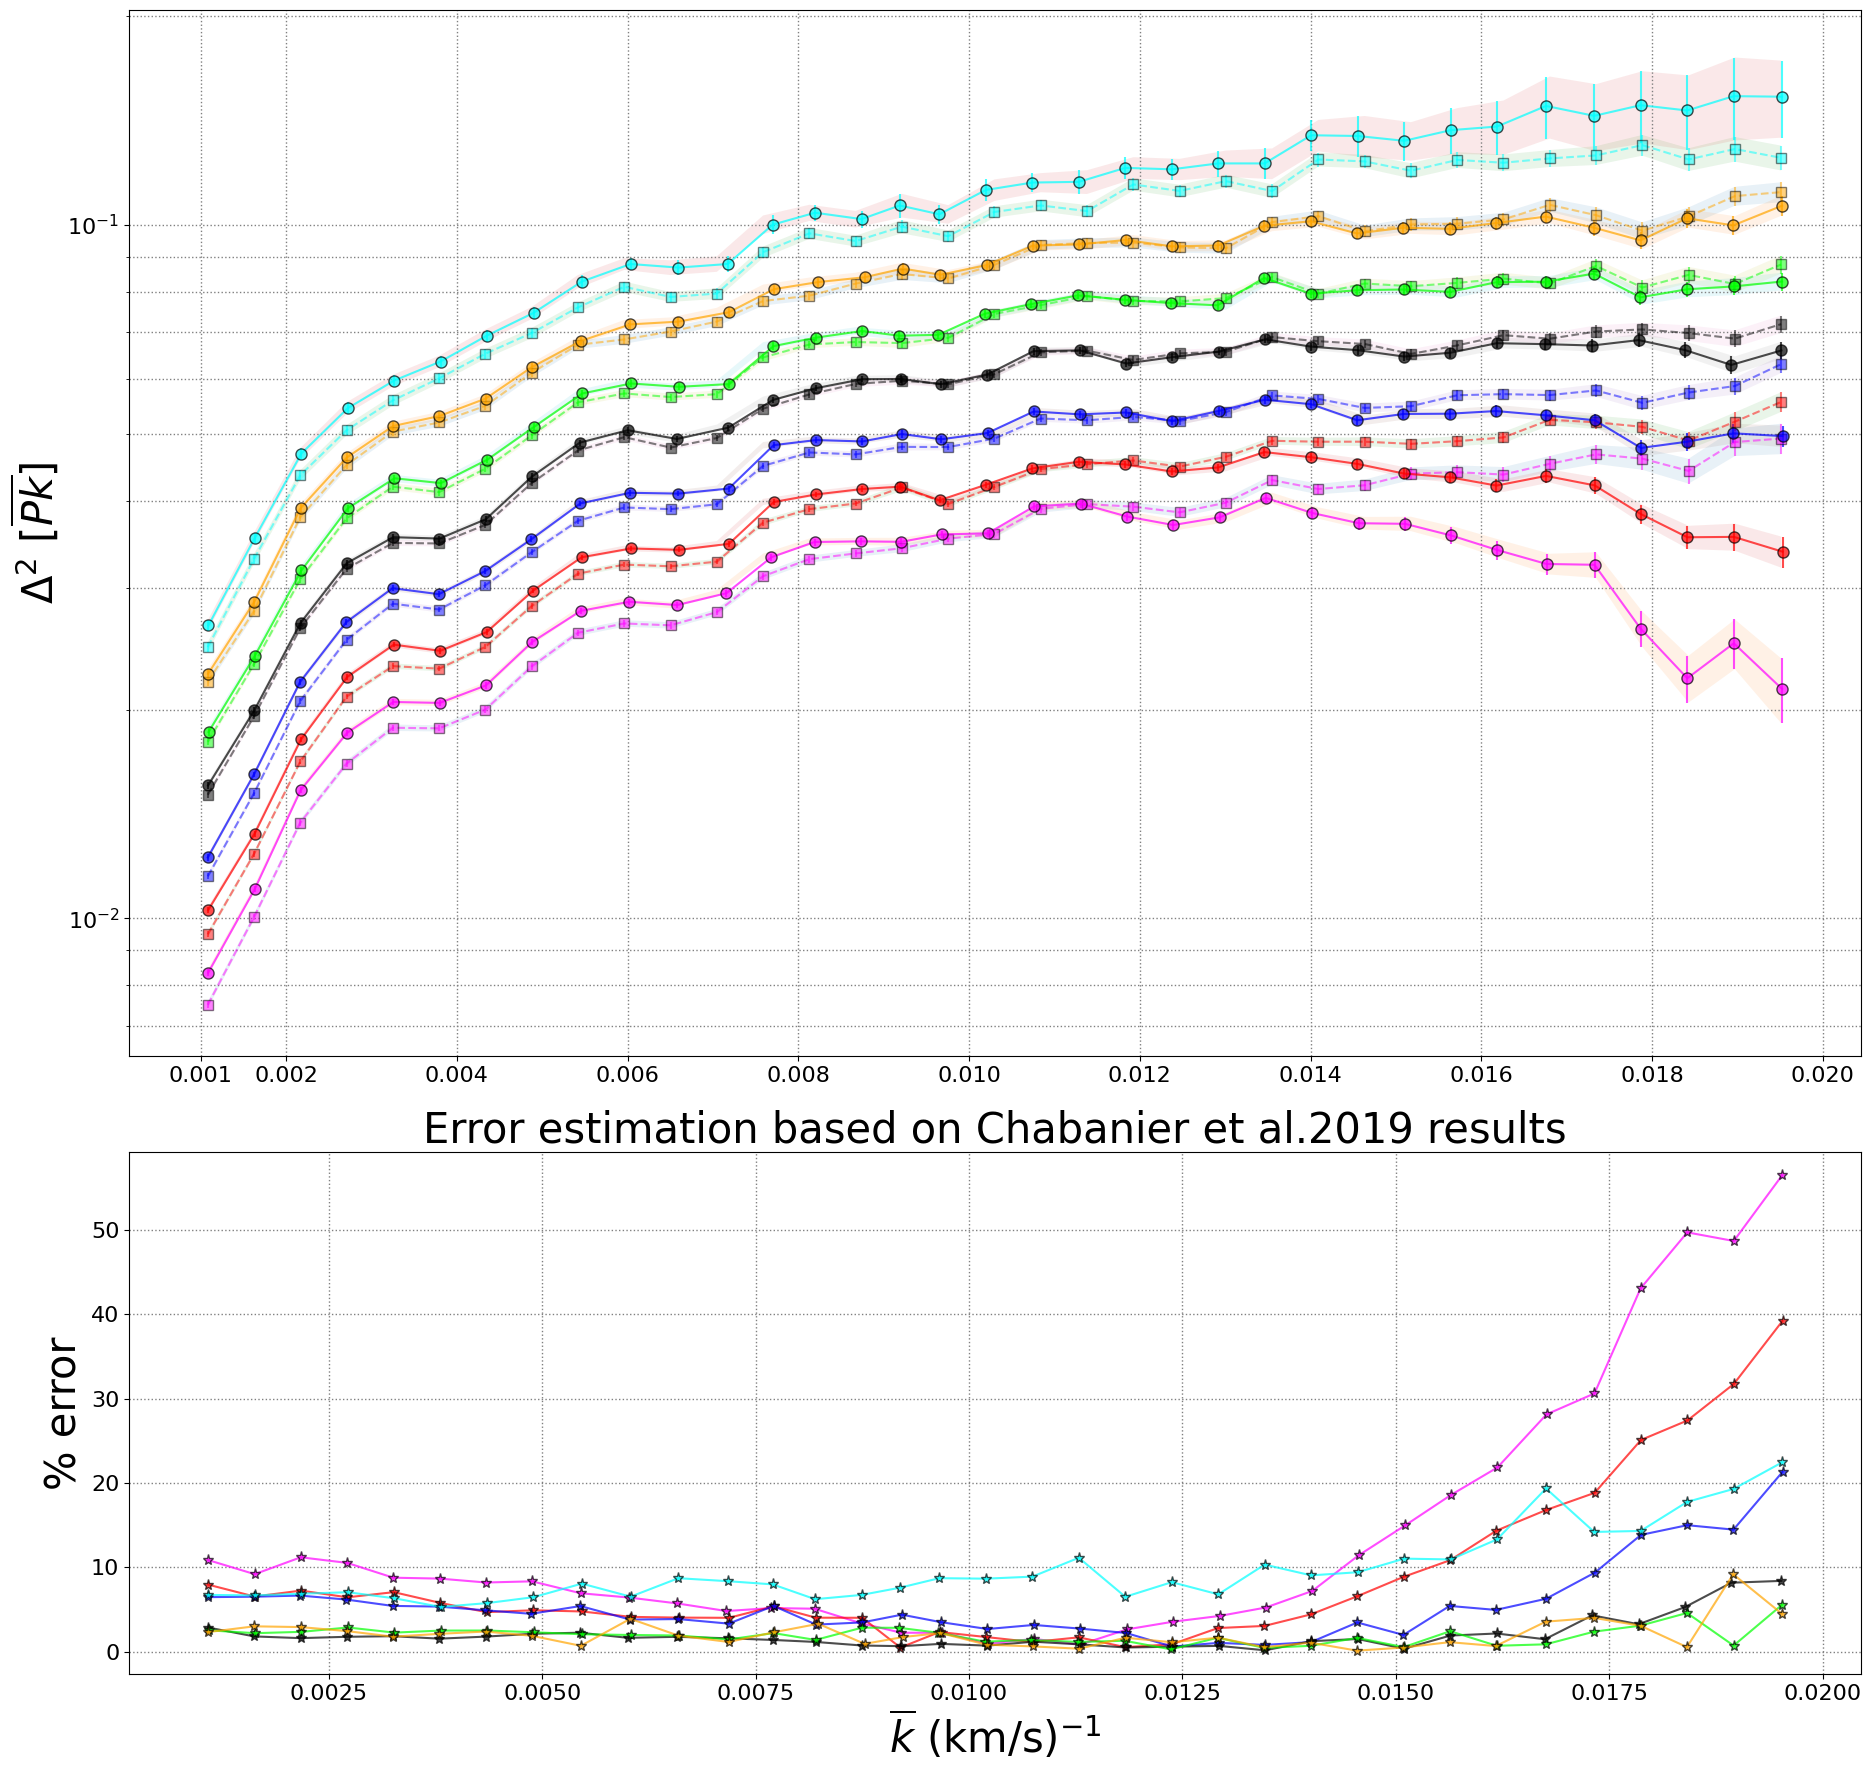

In [16]:
local_dir="/home/colgoat/TFPS"


file1="pk_DR12_V5_7Final_CorentinCopy.fits"
#file1="mean_Pk1d_run13.1.fits.gz"
local_fileCh = os.path.join(local_dir,file1)
PSCh=Table.read(local_fileCh)

file2="mean_Pk1d_run15.1.fits.gz"
local_fileA = os.path.join(local_dir,file2)
PSA=Table.read(local_fileA)

qlor = ["magenta","red","blue","black","lime","orange", 
        "cyan","mediumpurple","goldenrod","royalblue","silver","green","maroon"]

trs = [0.5,0.7,1.0]

num=7 #number of redshift bins to be plotted
ini=0 #Starter plotting bin

#ini  = { 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ,10 ,11 ,12 }
z_bin = [2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6]

fig, axs = plt.subplots(2,1,figsize=(19,18), gridspec_kw={'height_ratios': [2, 1]})


for a in range(num):
    binZCh = (PSCh['zbin'] == z_bin[ini+a])
    plCh = PSCh[binZCh]
    kCh = plCh['meank']
    PCh = (plCh['meanPk'] *  plCh['meank'])/np.pi
    erCh = (plCh['A'] *  plCh['meank'])/np.pi
    fu_Ch = ((erCh)) + (PCh) #fill upper
    fl_Ch = (PCh) - ((erCh)) #fill lower
    axs[0].errorbar(kCh,PCh,yerr = erCh, marker = 's', label = "bin z = "+str(z_bin[ini+a])+" expected",\
                    markersize = 7,color = qlor[ini+a], alpha = trs[0], mec ='k', linestyle = "--") 
    axs[0].fill_between(kCh,fu_Ch,fl_Ch, alpha = 0.1,label = 'error coverage')

    binZA = (PSA['zbin'] == z_bin[ini+a])
    plA = PSA[binZA]
    kA = plA['meank']
    PA = (plA['meanPk'] *  plA['meank'])/np.pi
    erA = (plA['errorPk'] *  plA['meank'])/np.pi
    fu_A = ((erA)) + (PA) #fill upper
    fl_A = (PA) - ((erA)) #fill lower
    EP = abs((plA['meanPk']-plCh['meanPk'])/plCh['meanPk'])*100
    axs[0].errorbar(kA,PA,yerr = erA, marker = 'o', label = "bin z = "+str(z_bin[ini+a])+" calculated",\
                    markersize = 8, color = qlor[ini+a], alpha = trs[1], mec ='k', linestyle = "-")
    axs[0].fill_between(kCh,fu_A,fl_A, alpha = 0.1,label = 'error coverage')
    axs[1].plot(kA,EP, marker = '*', markersize = 8,color = qlor[ini+a], alpha = trs[1], mec ='k')



axs[0].set_ylabel('${\Delta}^{2}$ [$\overline{Pk}$]', size = 30)
axs[0].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
#axs[0].legend(loc='lower right', bbox_to_anchor=(1, 0))
axs[0].set_xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020])
axs[0].set_yscale('log')

axs[1].set_xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
axs[1].set_ylabel('% error', size = 30)
axs[1].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
plt.title('Error estimation based on Chabanier et al.2019 results', size = 30)

Text(0.5, 1.0, 'Error estimation Picca(old version)')

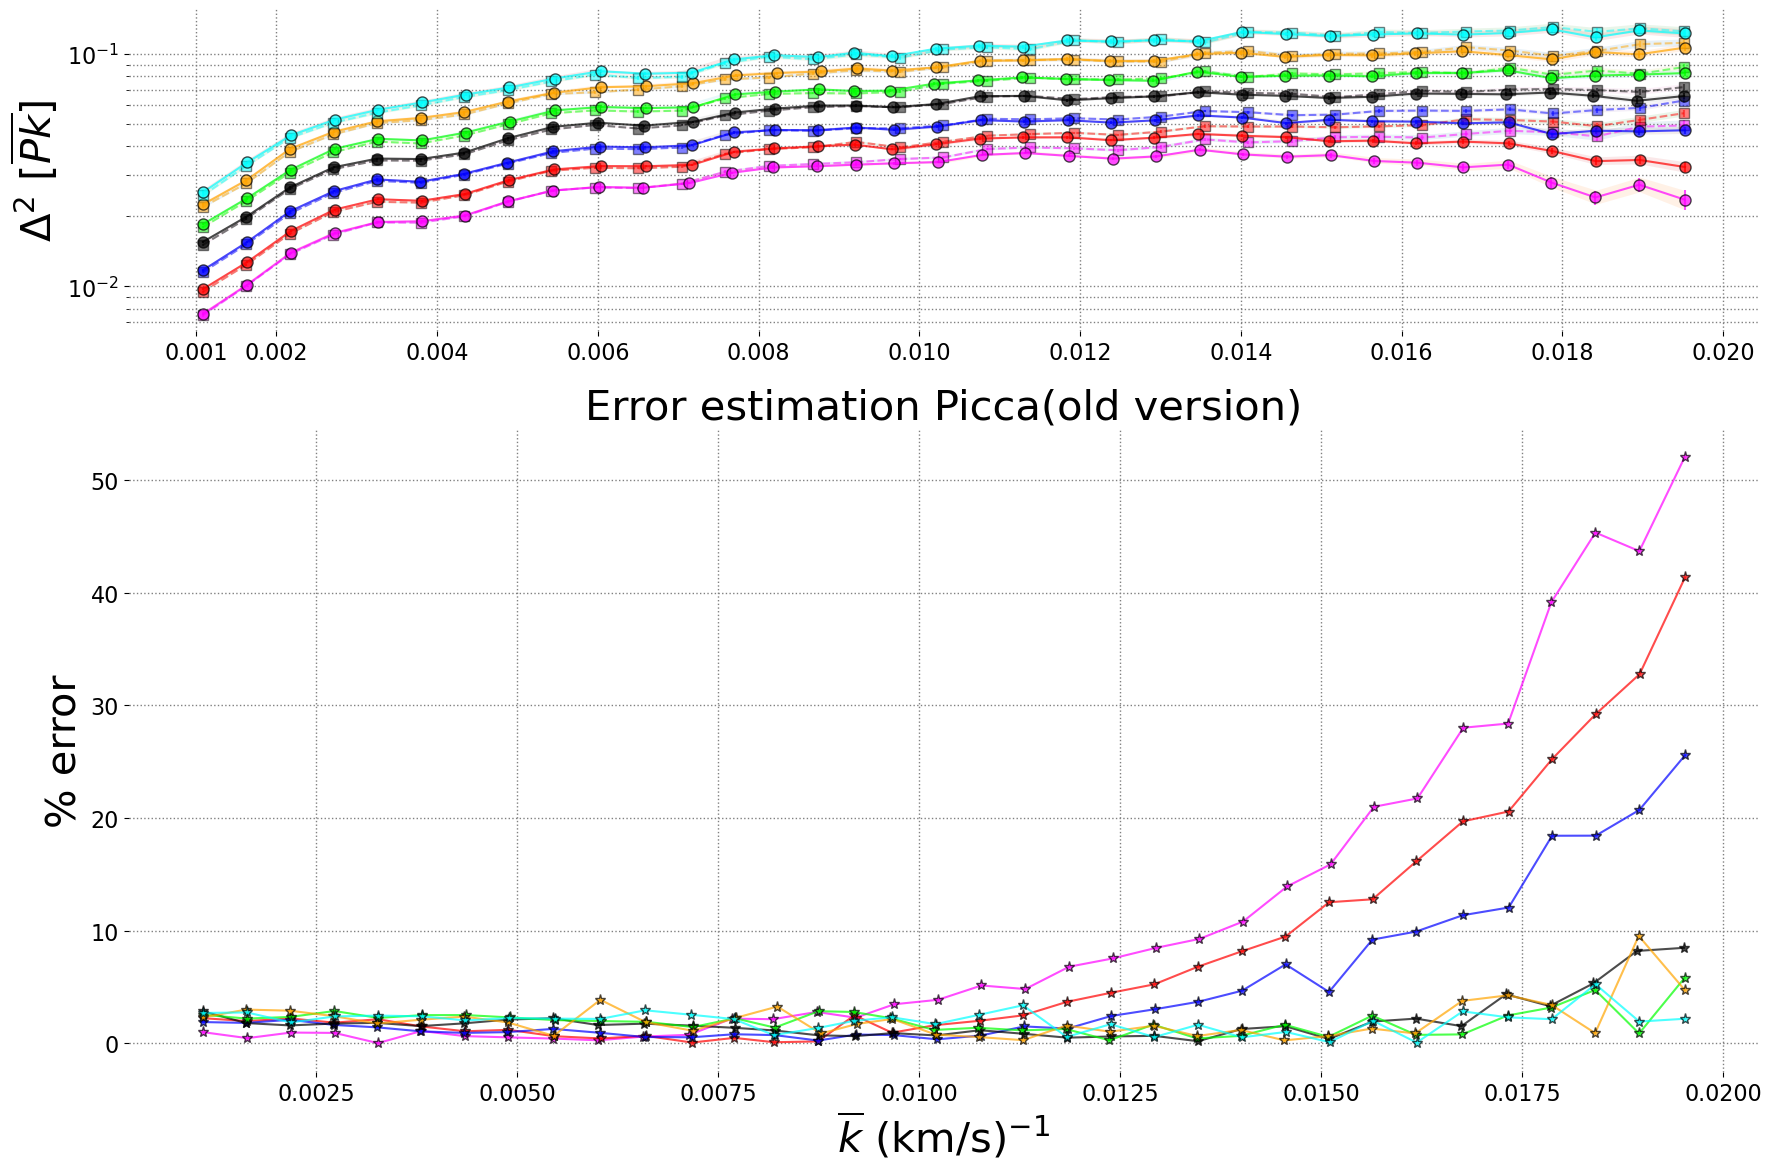

In [27]:
local_dir="/home/colgoat/TFPS"

file1="pk_DR12_V5_7Final_CorentinCopy.fits"
local_fileCh = os.path.join(local_dir,file1)
PSCh=Table.read(local_fileCh)

file2="mean_Pk1d_run13.1.fits"
local_fileA = os.path.join(local_dir,file2)
PSA=Table.read(local_fileA)

qlor = ["magenta","red","blue","black","lime","orange", 
        "cyan","mediumpurple","goldenrod","royalblue","silver","green","maroon"]

trs = [0.5,0.7,1.0]

num=7 #number of redshift bins to be plotted
ini=0 #Starter plotting bin

#ini  = { 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ,10 ,11 ,12 }
z_bin = [2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6]

fig, axs = plt.subplots(2,1,figsize=(18,12), gridspec_kw={'height_ratios': [1, 2]})


for a in range(num):
    binZCh = (PSCh['zbin'] == z_bin[ini+a])
    plCh = PSCh[binZCh]
    kCh = plCh['meank']
    PCh = (plCh['meanPk'] *  plCh['meank'])/np.pi
    erCh = (plCh['A'] *  plCh['meank'])/np.pi
    fu_Ch = ((erCh)) + (PCh) #fill upper
    fl_Ch = (PCh) - ((erCh)) #fill lower
    axs[0].errorbar(kCh,PCh,yerr = erCh, marker = 's', label = "bin z = "+str(z_bin[ini+a])+" expected",\
                    markersize = 7,color = qlor[ini+a], alpha = trs[0], mec ='k', linestyle = "--") 
    axs[0].fill_between(kCh,fu_Ch,fl_Ch, alpha = 0.1,label = 'error coverage')

    binZA = (PSA['zbin'] == z_bin[ini+a])
    plA = PSA[binZA]
    kA = plA['meank']
    PA = (plA['meanPk'] *  plA['meank'])/np.pi
    erA = (plA['errorPk'] *  plA['meank'])/np.pi
    fu_A = ((erA)) + (PA) #fill upper
    fl_A = (PA) - ((erA)) #fill lower
    EP = abs((plA['meanPk']-plCh['meanPk'])/plCh['meanPk'])*100
    axs[0].errorbar(kA,PA,yerr = erA, marker = 'o', label = "bin z = "+str(z_bin[ini+a])+" calculated",\
                    markersize = 8, color = qlor[ini+a], alpha = trs[1], mec ='k', linestyle = "-")
    axs[0].fill_between(kCh,fu_A,fl_A, alpha = 0.1,label = 'error coverage')
    axs[1].plot(kA,EP, marker = '*', markersize = 8,color = qlor[ini+a], alpha = trs[1], mec ='k')



axs[0].set_ylabel('${\Delta}^{2}$ [$\overline{Pk}$]', size = 30)
axs[0].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
#axs[0].legend(loc='lower right', bbox_to_anchor=(1, 0))
axs[0].set_xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020])
axs[0].set_yscale('log')

axs[1].set_xlabel('$\overline{k}$ (km/s)$^{-1}$', size = 30)
axs[1].set_ylabel('% error', size = 30)
axs[1].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
plt.title('Error estimation Picca(old version)', size = 30)

In [1]:
fig, axs = plt.subplot_mosaic([['a)', 'b)'], ['b)', 'c)']],
                              layout='constrained',\
                              gridspec_kw={'height_ratios': [2, 0.5],'width_ratios': [2, 0.25]})

for label, ax in axs.items():
    ax.set_title('-', fontstyle='italic')
    ax.set_title(label, fontfamily='serif', loc='left', fontsize='medium')

plt.show()

NameError: name 'plt' is not defined

In [2]:
PSCh

<Table length=455>
  zbin   meank    meanPk    A        B       C        D    
float64 float64  float64 float64  float64 float64  float64 
------- -------- ------- -------- ------- -------- --------
    2.2 0.001084 21.7406 0.246235 2.55509  3.05729 0.768792
    2.2 0.001626 19.4051  0.20821 2.57644  2.57233    0.578
    2.2 0.002168 19.9179 0.210008 2.61137  2.15247 0.540388
    2.2  0.00271 19.3806 0.205365 2.66835  1.79726 0.496016
    2.2 0.003252 18.1918 0.193162 2.73205   1.5044 0.447659
    2.2 0.003794 15.5615 0.160235 2.79782  1.27013 0.373313
    ...      ...     ...      ...     ...      ...      ...
    4.6  0.01626 74.1991  14.0236 30.9032 0.969718  3.99942
    4.6 0.016802 83.4179   17.086 34.8318   0.9737  4.78347
    4.6 0.017344 77.3123  12.6062  37.813 0.993587  4.73147
    4.6 0.017886 55.6004  12.6184 41.4172  1.03255  3.64306
    4.6 0.018428 58.0325  12.2942  45.802  1.09322  4.07565
    4.6  0.01897 70.6228  13.5988 52.6154  1.17742  5.32363
    4.6 0.019512  40.868  12.9181 59.2949    1.286  3.32168